In [6]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=1)
client

C:\Users\quant\Anaconda3\envs\tyche\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56392 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:56395' processes=1 threads=4, memory=17.12 GB>

In [7]:
from tyche.momentum import _mom_test, over_under_mavgs,YearWindows
from homer.base import BBGTicker, Signal
from typing import List
import babel.tickers
import datetime as dt
import dask
from dask import delayed
sigs: List[Signal] = []

def _mom_test_wrapper(ticker: BBGTicker, st: dt.date, end: dt.date, mom_fn, windows, *mom_fn_args, **mom_fn_kwargs):
    mom_sig: Signal = Signal(ticker,0)
    try:
        mom_sig = _mom_test(ticker,st,end,mom_fn,windows,*mom_fn_args,**mom_fn_kwargs)
    except Exception as e:
        print(e)
        pass
    return mom_sig

In [8]:
 for ticker in babel.tickers.momentum_tickers()[:10]:
    lazy_sig = dask.delayed(_mom_test_wrapper)(ticker, dt.date(2010, 1, 1), dt.date.today(), over_under_mavgs, YearWindows)
    sigs.append(lazy_sig)
    # _mom_test_wrapper(ticker, dt.date(2010, 1, 1), dt.date.today(), over_under_mavgs, YearWindows)

In [9]:
sigs[0]

Delayed('_mom_test_wrapper-774f3ae7-ce26-4def-8998-aea9ed4faeb8')

In [10]:
x = dask.compute(*sigs)

In [ ]:
import adb
d = {ticker:adb.adb.read_symbol(ticker, dt.date(2010, 1, 1), dt.date.today()) for ticker in babel.tickers.momentum_tickers()}

In [12]:
[(s.ticker, s.direction) for s in x]

[('EURGBP CURNCY', 1),
 ('EURAUD CURNCY', -1),
 ('EURNZD CURNCY', 1),
 ('EURUSD CURNCY', 1),
 ('EURCHF CURNCY', 1),
 ('EURCAD CURNCY', 1),
 ('EURSGD CURNCY', 1),
 ('EURHKD CURNCY', 1),
 ('EURCNH CURNCY', 1),
 ('EURCNY CURNCY', 1)]

In [13]:
x

(<homer.base.Signal at 0x21a244d0760>,
 <homer.base.Signal at 0x21a242a9820>)

In [14]:
sigs

[Delayed('_mom_test_wrapper-860ea4df-6cce-48fa-b225-184b850d879a'),
 Delayed('_mom_test_wrapper-58a0ff5c-647c-42bc-b72d-2bc99495b233'),
 Delayed('_mom_test_wrapper-b848278e-ffc3-4bf0-8762-6c504a330d25'),
 Delayed('_mom_test_wrapper-07a45af9-30d4-4ad9-adc5-f5018268e2b8'),
 Delayed('_mom_test_wrapper-ceeb8536-9ee0-4d5c-b287-cabd229383e6'),
 Delayed('_mom_test_wrapper-6529f7f9-ab2c-4f1b-aea5-f9e4cf5f87f8'),
 Delayed('_mom_test_wrapper-268a0071-69c5-4b97-b07b-e6f805651ffc'),
 Delayed('_mom_test_wrapper-99ff8aac-7cdb-4084-9179-cfa47fab2951'),
 Delayed('_mom_test_wrapper-2a1b9416-898e-4349-95af-9d6ff99901c0'),
 Delayed('_mom_test_wrapper-9e3500dd-2d6b-4368-aae8-b1e4b86bfae9')]

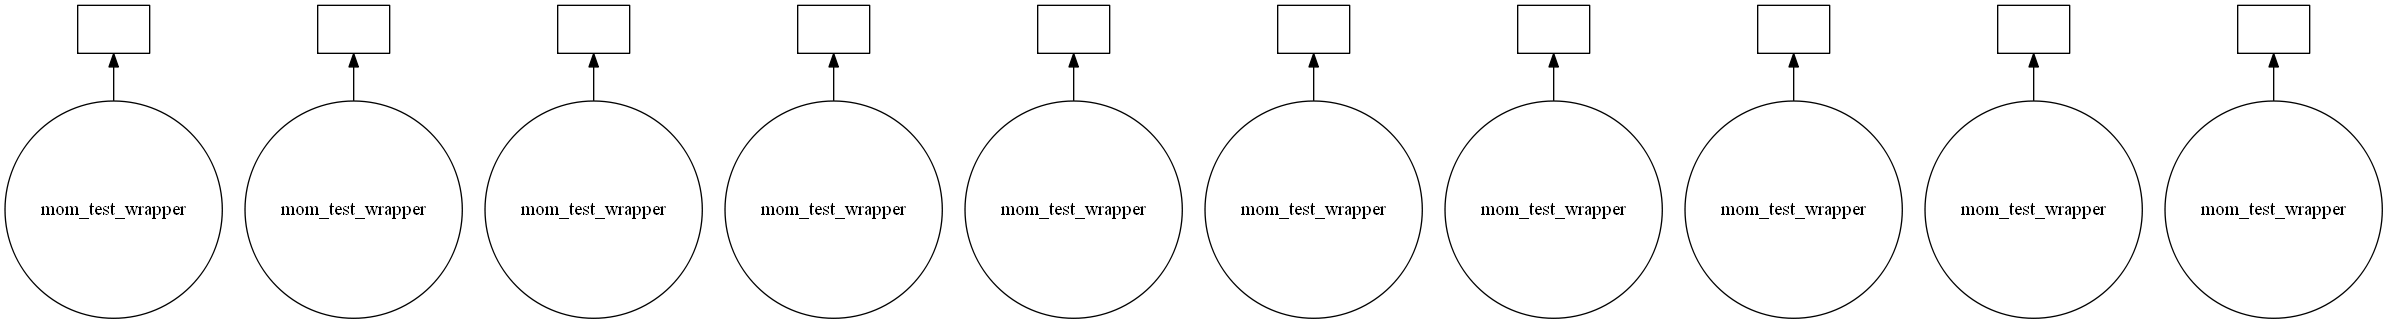

In [18]:
dask.visualize(sigs)

In [11]:
%timeit loop_approach = [_mom_test_wrapper(ticker, dt.date(2010, 1, 1), dt.date.today(), over_under_mavgs, YearWindows) for ticker in babel.tickers.momentum_tickers()[:10]]

2020-08-30 02:08:35,108 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  0.90444  0.90700  0.90338  0.90588            0.159215  0.90700   
2020-08-18  0.90587  0.90640  0.90085  0.90122           -0.513319  0.90640   
2020-08-19  0.90123  0.90459  0.90036  0.90390            0.296262  0.90459   
2020-08-20  0.90390  0.90685  0.89698  0.89755           -0.702511  0.90685   
2020-08-21  0.89755  0.90158  0.89444  0.90119            0.405548  0.90158   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  0.90338  0.90588          0.109406           0.00099  ...   
2020-08-18  0.90085  0.90122         -0.514417          -0.00466  ...   
2020-08-19  0.90036  0.90390          0.297375           0.00268  ...   
2020-08-20  0.89698  0.89755         

{'open': 0.89755, 'high': 0.90158, 'low': 0.89444, 'close': 0.90119, 'open_close_pct_chg': 0.40554843741296726, 'high_1D': 0.90158, 'low_1D': 0.89444, '1DMA': 0.9011900000000032, 'close_pct_chg_1d': 0.40554843741296726, 'close_net_chg_1d': 0.0036400000000000876, 'close_digital_1d': 1, 'close_streak_1d': 1, 'diff_from_1dma': -3.1086244689504383e-15, 'close_above_1dma': -1, 'days_above_1dma': -2118, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': inf, 'close_sortino_1d': inf, 'close_num_up_1d': 1.0, 'close_num_down_1d': 0.0, 'UpDownRatio_1d': inf}
'100DMA'


2020-08-30 02:08:36,832 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.65233  1.65307  1.64376  1.64538           -0.420618  1.65307   
2020-08-18  1.64538  1.65296  1.64387  1.64727            0.114867  1.65296   
2020-08-19  1.64724  1.64968  1.64151  1.64830            0.064350  1.64968   
2020-08-20  1.64830  1.65509  1.64697  1.64901            0.043075  1.65509   
2020-08-21  1.64901  1.65057  1.64140  1.64723           -0.107944  1.65057   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.64376  1.64538         -0.364539          -0.00602  ...   
2020-08-18  1.64387  1.64727          0.114867           0.00189  ...   
2020-08-19  1.64151  1.64830          0.062528           0.00103  ...   
2020-08-20  1.64697  1.64901         

{'open': 1.64901, 'high': 1.65057, 'low': 1.6414, 'close': 1.64723, 'open_close_pct_chg': -0.10794355401120155, 'high_1D': 1.65057, 'low_1D': 1.6414, '1DMA': 1.6472300000000075, 'close_pct_chg_1d': -0.10794355401120155, 'close_net_chg_1d': -0.0017800000000001148, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2772, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:38,572 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.8111  1.8181  1.8061  1.8100           -0.060737   1.8181   
2020-08-18  1.8100  1.8192  1.8056  1.8075           -0.138122   1.8192   
2020-08-19  1.8075  1.8093  1.7950  1.8051           -0.132780   1.8093   
2020-08-20  1.8051  1.8224  1.8031  1.8149            0.542906   1.8224   
2020-08-21  1.8149  1.8176  1.8013  1.8034           -0.633644   1.8176   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.8061  1.8100         -0.016572           -0.0003  ...   
2020-08-18  1.8056  1.8075         -0.138122           -0.0025  ...   
2020-08-19  1.7950  1.8051         -0.132780           -0.0024  ...   
2020-08-20  1.8031  1.8149          0.542906            0.0098  ...   
2020

{'open': 1.8149, 'high': 1.8176, 'low': 1.8013, 'close': 1.8034, 'open_close_pct_chg': -0.633643726927107, 'high_1D': 1.8176, 'low_1D': 1.8013, '1DMA': 1.803400000000016, 'close_pct_chg_1d': -0.633643726927107, 'close_net_chg_1d': -0.011500000000000066, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -1.6209256159527285e-14, 'close_above_1dma': -1, 'days_above_1dma': -2761, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:40,334 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.1844  1.1881  1.1829  1.1870            0.219520   1.1881   
2020-08-18  1.1870  1.1966  1.1866  1.1931            0.513901   1.1966   
2020-08-19  1.1931  1.1953  1.1831  1.1838           -0.779482   1.1953   
2020-08-20  1.1838  1.1869  1.1802  1.1860            0.185842   1.1869   
2020-08-21  1.1860  1.1883  1.1754  1.1797           -0.531197   1.1883   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.1829  1.1870          0.236447            0.0028  ...   
2020-08-18  1.1866  1.1931          0.513901            0.0061  ...   
2020-08-19  1.1831  1.1838         -0.779482           -0.0093  ...   
2020-08-20  1.1802  1.1860          0.185842            0.0022  ...   
2020

{'open': 1.186, 'high': 1.1883, 'low': 1.1754, 'close': 1.1797, 'open_close_pct_chg': -0.5311973018549724, 'high_1D': 1.1883, 'low_1D': 1.1754, '1DMA': 1.1797000000000075, 'close_pct_chg_1d': -0.5311973018549724, 'close_net_chg_1d': -0.006299999999999972, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2641, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:42,124 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.07664  1.07850  1.07455  1.07620           -0.040868  1.07850   
2020-08-18  1.07620  1.07902  1.07543  1.07829            0.194202  1.07902   
2020-08-19  1.07829  1.08494  1.07718  1.08339            0.472971  1.08494   
2020-08-20  1.08339  1.08421  1.07622  1.07653           -0.633198  1.08421   
2020-08-21  1.07653  1.07782  1.07365  1.07532           -0.112398  1.07782   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.07455  1.07620         -0.028797          -0.00031  ...   
2020-08-18  1.07543  1.07829          0.194202           0.00209  ...   
2020-08-19  1.07718  1.08339          0.472971           0.00510  ...   
2020-08-20  1.07622  1.07653         

{'open': 1.07653, 'high': 1.07782, 'low': 1.07365, 'close': 1.07532, 'open_close_pct_chg': -0.1123981681885255, 'high_1D': 1.07782, 'low_1D': 1.07365, '1DMA': 1.0753200000000072, 'close_pct_chg_1d': -0.1123981681885255, 'close_net_chg_1d': -0.0012099999999999334, 'close_digital_1d': -1, 'close_streak_1d': -2, 'diff_from_1dma': -7.105427357601002e-15, 'close_above_1dma': -1, 'days_above_1dma': -1398, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:43,880 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.57008  1.57226  1.56539  1.56868           -0.089167  1.57226   
2020-08-18  1.56868  1.57549  1.56546  1.57115            0.157457  1.57549   
2020-08-19  1.57113  1.57257  1.56228  1.56462           -0.414351  1.57257   
2020-08-20  1.56460  1.56793  1.56138  1.56401           -0.037709  1.56793   
2020-08-21  1.56401  1.56445  1.55242  1.55443           -0.612528  1.56445   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.56539  1.56868         -0.135599          -0.00213  ...   
2020-08-18  1.56546  1.57115          0.157457           0.00247  ...   
2020-08-19  1.56228  1.56462         -0.415619          -0.00653  ...   
2020-08-20  1.56138  1.56401         

{'open': 1.5640100000000001, 'high': 1.56445, 'low': 1.5524200000000001, 'close': 1.55443, 'open_close_pct_chg': -0.6125280528896966, 'high_1D': 1.56445, 'low_1D': 1.5524200000000001, '1DMA': 1.5544299999999964, 'close_pct_chg_1d': -0.6125280528896966, 'close_net_chg_1d': -0.009580000000000144, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 3.552713678800501e-15, 'close_above_1dma': 1, 'days_above_1dma': 778, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:45,705 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.6257  1.6260  1.6209  1.6238           -0.116873   1.6260   
2020-08-18  1.6238  1.6317  1.6234  1.6281            0.264811   1.6317   
2020-08-19  1.6280  1.6305  1.6202  1.6221           -0.362408   1.6305   
2020-08-20  1.6220  1.6260  1.6179  1.6215           -0.030826   1.6260   
2020-08-21  1.6215  1.6231  1.6121  1.6181           -0.209682   1.6231   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.6209  1.6238          0.024640            0.0004  ...   
2020-08-18  1.6234  1.6281          0.264811            0.0043  ...   
2020-08-19  1.6202  1.6221         -0.368528           -0.0060  ...   
2020-08-20  1.6179  1.6215         -0.036989           -0.0006  ...   
2020

{'open': 1.6215000000000002, 'high': 1.6231, 'low': 1.6120999999999999, 'close': 1.6181, 'open_close_pct_chg': -0.2096823928461344, 'high_1D': 1.6231, 'low_1D': 1.6120999999999999, '1DMA': 1.6180999999999903, 'close_pct_chg_1d': -0.2096823928461344, 'close_net_chg_1d': -0.0034000000000000696, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 9.769962616701378e-15, 'close_above_1dma': 1, 'days_above_1dma': 2506, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:47,388 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  9.1804  9.2082  9.1680  9.1999            0.212409   9.2082   
2020-08-18  9.1999  9.2737  9.1968  9.2469            0.510875   9.2737   
2020-08-19  9.2469  9.2635  9.1689  9.1752           -0.775395   9.2635   
2020-08-20  9.1752  9.1985  9.1471  9.1919            0.182012   9.1985   
2020-08-21  9.1919  9.2095  9.1101  9.1427           -0.535254   9.2095   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  9.1680  9.1999          0.230970            0.0212  ...   
2020-08-18  9.1968  9.2469          0.510875            0.0470  ...   
2020-08-19  9.1689  9.1752         -0.775395           -0.0717  ...   
2020-08-20  9.1471  9.1919          0.182012            0.0167  ...   
2020

{'open': 9.1919, 'high': 9.2095, 'low': 9.1101, 'close': 9.1427, 'open_close_pct_chg': -0.5352538648157703, 'high_1D': 9.2095, 'low_1D': 9.1101, '1DMA': 9.142700000000094, 'close_pct_chg_1d': -0.5352538648157703, 'close_net_chg_1d': -0.0492000000000008, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -9.414691248821327e-14, 'close_above_1dma': -1, 'days_above_1dma': -1524, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:49,123 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2241  8.2362  8.2073  8.2289            0.058365   8.2362   
2020-08-18  8.2289  8.2647  8.2258  8.2396            0.130030   8.2647   
2020-08-19  8.2396  8.2603  8.1862  8.1939           -0.554639   8.2603   
2020-08-20  8.1937  8.2034  8.1701  8.1926           -0.013425   8.2034   
2020-08-21  8.1926  8.1980  8.1359  8.1601           -0.396699   8.1980   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2073  8.2289          0.063232            0.0052  ...   
2020-08-18  8.2258  8.2396          0.130030            0.0107  ...   
2020-08-19  8.1862  8.1939         -0.554639           -0.0457  ...   
2020-08-20  8.1701  8.1926         -0.015865           -0.0013  ...   
2020

{'open': 8.1926, 'high': 8.198, 'low': 8.1359, 'close': 8.1601, 'open_close_pct_chg': -0.3966994604887415, 'high_1D': 8.198, 'low_1D': 8.1359, '1DMA': 8.16010000000002, 'close_pct_chg_1d': -0.3966994604887415, 'close_net_chg_1d': -0.03250000000000064, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': -1.9539925233402755e-14, 'close_above_1dma': -1, 'days_above_1dma': -1917, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:50,772 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2338  8.2414  8.2122  8.2262           -0.092302   8.2414   
2020-08-18  8.2431  8.2712  8.2323  8.2539            0.131019   8.2712   
2020-08-19  8.2688  8.2688  8.2283  8.2319           -0.446256   8.2688   
2020-08-20  8.1896  8.2076  8.1717  8.1953            0.069600   8.2076   
2020-08-21  8.2061  8.2078  8.1376  8.1549           -0.623926   8.2078   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2122  8.2262          0.041348            0.0034  ...   
2020-08-18  8.2323  8.2539          0.336729            0.0277  ...   
2020-08-19  8.2283  8.2319         -0.266541           -0.0220  ...   
2020-08-20  8.1717  8.1953         -0.444612           -0.0366  ...   
2020

{'open': 8.2061, 'high': 8.2078, 'low': 8.1376, 'close': 8.1549, 'open_close_pct_chg': -0.6239261037520831, 'high_1D': 8.2078, 'low_1D': 8.1376, '1DMA': 8.154899999999952, 'close_pct_chg_1d': -0.4929654802142691, 'close_net_chg_1d': -0.04039999999999999, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 4.796163466380676e-14, 'close_above_1dma': 1, 'days_above_1dma': 966, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:53,022 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  0.90444  0.90700  0.90338  0.90588            0.159215  0.90700   
2020-08-18  0.90587  0.90640  0.90085  0.90122           -0.513319  0.90640   
2020-08-19  0.90123  0.90459  0.90036  0.90390            0.296262  0.90459   
2020-08-20  0.90390  0.90685  0.89698  0.89755           -0.702511  0.90685   
2020-08-21  0.89755  0.90158  0.89444  0.90119            0.405548  0.90158   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  0.90338  0.90588          0.109406           0.00099  ...   
2020-08-18  0.90085  0.90122         -0.514417          -0.00466  ...   
2020-08-19  0.90036  0.90390          0.297375           0.00268  ...   
2020-08-20  0.89698  0.89755         

{'open': 0.89755, 'high': 0.90158, 'low': 0.89444, 'close': 0.90119, 'open_close_pct_chg': 0.40554843741296726, 'high_1D': 0.90158, 'low_1D': 0.89444, '1DMA': 0.9011900000000032, 'close_pct_chg_1d': 0.40554843741296726, 'close_net_chg_1d': 0.0036400000000000876, 'close_digital_1d': 1, 'close_streak_1d': 1, 'diff_from_1dma': -3.1086244689504383e-15, 'close_above_1dma': -1, 'days_above_1dma': -2118, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': inf, 'close_sortino_1d': inf, 'close_num_up_1d': 1.0, 'close_num_down_1d': 0.0, 'UpDownRatio_1d': inf}
'100DMA'


2020-08-30 02:08:54,775 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.65233  1.65307  1.64376  1.64538           -0.420618  1.65307   
2020-08-18  1.64538  1.65296  1.64387  1.64727            0.114867  1.65296   
2020-08-19  1.64724  1.64968  1.64151  1.64830            0.064350  1.64968   
2020-08-20  1.64830  1.65509  1.64697  1.64901            0.043075  1.65509   
2020-08-21  1.64901  1.65057  1.64140  1.64723           -0.107944  1.65057   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.64376  1.64538         -0.364539          -0.00602  ...   
2020-08-18  1.64387  1.64727          0.114867           0.00189  ...   
2020-08-19  1.64151  1.64830          0.062528           0.00103  ...   
2020-08-20  1.64697  1.64901         

{'open': 1.64901, 'high': 1.65057, 'low': 1.6414, 'close': 1.64723, 'open_close_pct_chg': -0.10794355401120155, 'high_1D': 1.65057, 'low_1D': 1.6414, '1DMA': 1.6472300000000075, 'close_pct_chg_1d': -0.10794355401120155, 'close_net_chg_1d': -0.0017800000000001148, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2772, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:56,507 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.8111  1.8181  1.8061  1.8100           -0.060737   1.8181   
2020-08-18  1.8100  1.8192  1.8056  1.8075           -0.138122   1.8192   
2020-08-19  1.8075  1.8093  1.7950  1.8051           -0.132780   1.8093   
2020-08-20  1.8051  1.8224  1.8031  1.8149            0.542906   1.8224   
2020-08-21  1.8149  1.8176  1.8013  1.8034           -0.633644   1.8176   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.8061  1.8100         -0.016572           -0.0003  ...   
2020-08-18  1.8056  1.8075         -0.138122           -0.0025  ...   
2020-08-19  1.7950  1.8051         -0.132780           -0.0024  ...   
2020-08-20  1.8031  1.8149          0.542906            0.0098  ...   
2020

{'open': 1.8149, 'high': 1.8176, 'low': 1.8013, 'close': 1.8034, 'open_close_pct_chg': -0.633643726927107, 'high_1D': 1.8176, 'low_1D': 1.8013, '1DMA': 1.803400000000016, 'close_pct_chg_1d': -0.633643726927107, 'close_net_chg_1d': -0.011500000000000066, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -1.6209256159527285e-14, 'close_above_1dma': -1, 'days_above_1dma': -2761, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:08:58,272 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.1844  1.1881  1.1829  1.1870            0.219520   1.1881   
2020-08-18  1.1870  1.1966  1.1866  1.1931            0.513901   1.1966   
2020-08-19  1.1931  1.1953  1.1831  1.1838           -0.779482   1.1953   
2020-08-20  1.1838  1.1869  1.1802  1.1860            0.185842   1.1869   
2020-08-21  1.1860  1.1883  1.1754  1.1797           -0.531197   1.1883   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.1829  1.1870          0.236447            0.0028  ...   
2020-08-18  1.1866  1.1931          0.513901            0.0061  ...   
2020-08-19  1.1831  1.1838         -0.779482           -0.0093  ...   
2020-08-20  1.1802  1.1860          0.185842            0.0022  ...   
2020

{'open': 1.186, 'high': 1.1883, 'low': 1.1754, 'close': 1.1797, 'open_close_pct_chg': -0.5311973018549724, 'high_1D': 1.1883, 'low_1D': 1.1754, '1DMA': 1.1797000000000075, 'close_pct_chg_1d': -0.5311973018549724, 'close_net_chg_1d': -0.006299999999999972, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2641, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:00,099 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.07664  1.07850  1.07455  1.07620           -0.040868  1.07850   
2020-08-18  1.07620  1.07902  1.07543  1.07829            0.194202  1.07902   
2020-08-19  1.07829  1.08494  1.07718  1.08339            0.472971  1.08494   
2020-08-20  1.08339  1.08421  1.07622  1.07653           -0.633198  1.08421   
2020-08-21  1.07653  1.07782  1.07365  1.07532           -0.112398  1.07782   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.07455  1.07620         -0.028797          -0.00031  ...   
2020-08-18  1.07543  1.07829          0.194202           0.00209  ...   
2020-08-19  1.07718  1.08339          0.472971           0.00510  ...   
2020-08-20  1.07622  1.07653         

{'open': 1.07653, 'high': 1.07782, 'low': 1.07365, 'close': 1.07532, 'open_close_pct_chg': -0.1123981681885255, 'high_1D': 1.07782, 'low_1D': 1.07365, '1DMA': 1.0753200000000072, 'close_pct_chg_1d': -0.1123981681885255, 'close_net_chg_1d': -0.0012099999999999334, 'close_digital_1d': -1, 'close_streak_1d': -2, 'diff_from_1dma': -7.105427357601002e-15, 'close_above_1dma': -1, 'days_above_1dma': -1398, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:01,858 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.57008  1.57226  1.56539  1.56868           -0.089167  1.57226   
2020-08-18  1.56868  1.57549  1.56546  1.57115            0.157457  1.57549   
2020-08-19  1.57113  1.57257  1.56228  1.56462           -0.414351  1.57257   
2020-08-20  1.56460  1.56793  1.56138  1.56401           -0.037709  1.56793   
2020-08-21  1.56401  1.56445  1.55242  1.55443           -0.612528  1.56445   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.56539  1.56868         -0.135599          -0.00213  ...   
2020-08-18  1.56546  1.57115          0.157457           0.00247  ...   
2020-08-19  1.56228  1.56462         -0.415619          -0.00653  ...   
2020-08-20  1.56138  1.56401         

{'open': 1.5640100000000001, 'high': 1.56445, 'low': 1.5524200000000001, 'close': 1.55443, 'open_close_pct_chg': -0.6125280528896966, 'high_1D': 1.56445, 'low_1D': 1.5524200000000001, '1DMA': 1.5544299999999964, 'close_pct_chg_1d': -0.6125280528896966, 'close_net_chg_1d': -0.009580000000000144, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 3.552713678800501e-15, 'close_above_1dma': 1, 'days_above_1dma': 778, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:03,655 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.6257  1.6260  1.6209  1.6238           -0.116873   1.6260   
2020-08-18  1.6238  1.6317  1.6234  1.6281            0.264811   1.6317   
2020-08-19  1.6280  1.6305  1.6202  1.6221           -0.362408   1.6305   
2020-08-20  1.6220  1.6260  1.6179  1.6215           -0.030826   1.6260   
2020-08-21  1.6215  1.6231  1.6121  1.6181           -0.209682   1.6231   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.6209  1.6238          0.024640            0.0004  ...   
2020-08-18  1.6234  1.6281          0.264811            0.0043  ...   
2020-08-19  1.6202  1.6221         -0.368528           -0.0060  ...   
2020-08-20  1.6179  1.6215         -0.036989           -0.0006  ...   
2020

{'open': 1.6215000000000002, 'high': 1.6231, 'low': 1.6120999999999999, 'close': 1.6181, 'open_close_pct_chg': -0.2096823928461344, 'high_1D': 1.6231, 'low_1D': 1.6120999999999999, '1DMA': 1.6180999999999903, 'close_pct_chg_1d': -0.2096823928461344, 'close_net_chg_1d': -0.0034000000000000696, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 9.769962616701378e-15, 'close_above_1dma': 1, 'days_above_1dma': 2506, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:05,348 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  9.1804  9.2082  9.1680  9.1999            0.212409   9.2082   
2020-08-18  9.1999  9.2737  9.1968  9.2469            0.510875   9.2737   
2020-08-19  9.2469  9.2635  9.1689  9.1752           -0.775395   9.2635   
2020-08-20  9.1752  9.1985  9.1471  9.1919            0.182012   9.1985   
2020-08-21  9.1919  9.2095  9.1101  9.1427           -0.535254   9.2095   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  9.1680  9.1999          0.230970            0.0212  ...   
2020-08-18  9.1968  9.2469          0.510875            0.0470  ...   
2020-08-19  9.1689  9.1752         -0.775395           -0.0717  ...   
2020-08-20  9.1471  9.1919          0.182012            0.0167  ...   
2020

{'open': 9.1919, 'high': 9.2095, 'low': 9.1101, 'close': 9.1427, 'open_close_pct_chg': -0.5352538648157703, 'high_1D': 9.2095, 'low_1D': 9.1101, '1DMA': 9.142700000000094, 'close_pct_chg_1d': -0.5352538648157703, 'close_net_chg_1d': -0.0492000000000008, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -9.414691248821327e-14, 'close_above_1dma': -1, 'days_above_1dma': -1524, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:07,082 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2241  8.2362  8.2073  8.2289            0.058365   8.2362   
2020-08-18  8.2289  8.2647  8.2258  8.2396            0.130030   8.2647   
2020-08-19  8.2396  8.2603  8.1862  8.1939           -0.554639   8.2603   
2020-08-20  8.1937  8.2034  8.1701  8.1926           -0.013425   8.2034   
2020-08-21  8.1926  8.1980  8.1359  8.1601           -0.396699   8.1980   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2073  8.2289          0.063232            0.0052  ...   
2020-08-18  8.2258  8.2396          0.130030            0.0107  ...   
2020-08-19  8.1862  8.1939         -0.554639           -0.0457  ...   
2020-08-20  8.1701  8.1926         -0.015865           -0.0013  ...   
2020

{'open': 8.1926, 'high': 8.198, 'low': 8.1359, 'close': 8.1601, 'open_close_pct_chg': -0.3966994604887415, 'high_1D': 8.198, 'low_1D': 8.1359, '1DMA': 8.16010000000002, 'close_pct_chg_1d': -0.3966994604887415, 'close_net_chg_1d': -0.03250000000000064, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': -1.9539925233402755e-14, 'close_above_1dma': -1, 'days_above_1dma': -1917, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:08,725 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2338  8.2414  8.2122  8.2262           -0.092302   8.2414   
2020-08-18  8.2431  8.2712  8.2323  8.2539            0.131019   8.2712   
2020-08-19  8.2688  8.2688  8.2283  8.2319           -0.446256   8.2688   
2020-08-20  8.1896  8.2076  8.1717  8.1953            0.069600   8.2076   
2020-08-21  8.2061  8.2078  8.1376  8.1549           -0.623926   8.2078   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2122  8.2262          0.041348            0.0034  ...   
2020-08-18  8.2323  8.2539          0.336729            0.0277  ...   
2020-08-19  8.2283  8.2319         -0.266541           -0.0220  ...   
2020-08-20  8.1717  8.1953         -0.444612           -0.0366  ...   
2020

{'open': 8.2061, 'high': 8.2078, 'low': 8.1376, 'close': 8.1549, 'open_close_pct_chg': -0.6239261037520831, 'high_1D': 8.2078, 'low_1D': 8.1376, '1DMA': 8.154899999999952, 'close_pct_chg_1d': -0.4929654802142691, 'close_net_chg_1d': -0.04039999999999999, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 4.796163466380676e-14, 'close_above_1dma': 1, 'days_above_1dma': 966, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:11,072 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  0.90444  0.90700  0.90338  0.90588            0.159215  0.90700   
2020-08-18  0.90587  0.90640  0.90085  0.90122           -0.513319  0.90640   
2020-08-19  0.90123  0.90459  0.90036  0.90390            0.296262  0.90459   
2020-08-20  0.90390  0.90685  0.89698  0.89755           -0.702511  0.90685   
2020-08-21  0.89755  0.90158  0.89444  0.90119            0.405548  0.90158   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  0.90338  0.90588          0.109406           0.00099  ...   
2020-08-18  0.90085  0.90122         -0.514417          -0.00466  ...   
2020-08-19  0.90036  0.90390          0.297375           0.00268  ...   
2020-08-20  0.89698  0.89755         

{'open': 0.89755, 'high': 0.90158, 'low': 0.89444, 'close': 0.90119, 'open_close_pct_chg': 0.40554843741296726, 'high_1D': 0.90158, 'low_1D': 0.89444, '1DMA': 0.9011900000000032, 'close_pct_chg_1d': 0.40554843741296726, 'close_net_chg_1d': 0.0036400000000000876, 'close_digital_1d': 1, 'close_streak_1d': 1, 'diff_from_1dma': -3.1086244689504383e-15, 'close_above_1dma': -1, 'days_above_1dma': -2118, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': inf, 'close_sortino_1d': inf, 'close_num_up_1d': 1.0, 'close_num_down_1d': 0.0, 'UpDownRatio_1d': inf}
'100DMA'


2020-08-30 02:09:12,833 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.65233  1.65307  1.64376  1.64538           -0.420618  1.65307   
2020-08-18  1.64538  1.65296  1.64387  1.64727            0.114867  1.65296   
2020-08-19  1.64724  1.64968  1.64151  1.64830            0.064350  1.64968   
2020-08-20  1.64830  1.65509  1.64697  1.64901            0.043075  1.65509   
2020-08-21  1.64901  1.65057  1.64140  1.64723           -0.107944  1.65057   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.64376  1.64538         -0.364539          -0.00602  ...   
2020-08-18  1.64387  1.64727          0.114867           0.00189  ...   
2020-08-19  1.64151  1.64830          0.062528           0.00103  ...   
2020-08-20  1.64697  1.64901         

{'open': 1.64901, 'high': 1.65057, 'low': 1.6414, 'close': 1.64723, 'open_close_pct_chg': -0.10794355401120155, 'high_1D': 1.65057, 'low_1D': 1.6414, '1DMA': 1.6472300000000075, 'close_pct_chg_1d': -0.10794355401120155, 'close_net_chg_1d': -0.0017800000000001148, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2772, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:14,576 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.8111  1.8181  1.8061  1.8100           -0.060737   1.8181   
2020-08-18  1.8100  1.8192  1.8056  1.8075           -0.138122   1.8192   
2020-08-19  1.8075  1.8093  1.7950  1.8051           -0.132780   1.8093   
2020-08-20  1.8051  1.8224  1.8031  1.8149            0.542906   1.8224   
2020-08-21  1.8149  1.8176  1.8013  1.8034           -0.633644   1.8176   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.8061  1.8100         -0.016572           -0.0003  ...   
2020-08-18  1.8056  1.8075         -0.138122           -0.0025  ...   
2020-08-19  1.7950  1.8051         -0.132780           -0.0024  ...   
2020-08-20  1.8031  1.8149          0.542906            0.0098  ...   
2020

{'open': 1.8149, 'high': 1.8176, 'low': 1.8013, 'close': 1.8034, 'open_close_pct_chg': -0.633643726927107, 'high_1D': 1.8176, 'low_1D': 1.8013, '1DMA': 1.803400000000016, 'close_pct_chg_1d': -0.633643726927107, 'close_net_chg_1d': -0.011500000000000066, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -1.6209256159527285e-14, 'close_above_1dma': -1, 'days_above_1dma': -2761, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:16,339 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.1844  1.1881  1.1829  1.1870            0.219520   1.1881   
2020-08-18  1.1870  1.1966  1.1866  1.1931            0.513901   1.1966   
2020-08-19  1.1931  1.1953  1.1831  1.1838           -0.779482   1.1953   
2020-08-20  1.1838  1.1869  1.1802  1.1860            0.185842   1.1869   
2020-08-21  1.1860  1.1883  1.1754  1.1797           -0.531197   1.1883   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.1829  1.1870          0.236447            0.0028  ...   
2020-08-18  1.1866  1.1931          0.513901            0.0061  ...   
2020-08-19  1.1831  1.1838         -0.779482           -0.0093  ...   
2020-08-20  1.1802  1.1860          0.185842            0.0022  ...   
2020

{'open': 1.186, 'high': 1.1883, 'low': 1.1754, 'close': 1.1797, 'open_close_pct_chg': -0.5311973018549724, 'high_1D': 1.1883, 'low_1D': 1.1754, '1DMA': 1.1797000000000075, 'close_pct_chg_1d': -0.5311973018549724, 'close_net_chg_1d': -0.006299999999999972, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2641, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:18,111 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.07664  1.07850  1.07455  1.07620           -0.040868  1.07850   
2020-08-18  1.07620  1.07902  1.07543  1.07829            0.194202  1.07902   
2020-08-19  1.07829  1.08494  1.07718  1.08339            0.472971  1.08494   
2020-08-20  1.08339  1.08421  1.07622  1.07653           -0.633198  1.08421   
2020-08-21  1.07653  1.07782  1.07365  1.07532           -0.112398  1.07782   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.07455  1.07620         -0.028797          -0.00031  ...   
2020-08-18  1.07543  1.07829          0.194202           0.00209  ...   
2020-08-19  1.07718  1.08339          0.472971           0.00510  ...   
2020-08-20  1.07622  1.07653         

{'open': 1.07653, 'high': 1.07782, 'low': 1.07365, 'close': 1.07532, 'open_close_pct_chg': -0.1123981681885255, 'high_1D': 1.07782, 'low_1D': 1.07365, '1DMA': 1.0753200000000072, 'close_pct_chg_1d': -0.1123981681885255, 'close_net_chg_1d': -0.0012099999999999334, 'close_digital_1d': -1, 'close_streak_1d': -2, 'diff_from_1dma': -7.105427357601002e-15, 'close_above_1dma': -1, 'days_above_1dma': -1398, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:19,893 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.57008  1.57226  1.56539  1.56868           -0.089167  1.57226   
2020-08-18  1.56868  1.57549  1.56546  1.57115            0.157457  1.57549   
2020-08-19  1.57113  1.57257  1.56228  1.56462           -0.414351  1.57257   
2020-08-20  1.56460  1.56793  1.56138  1.56401           -0.037709  1.56793   
2020-08-21  1.56401  1.56445  1.55242  1.55443           -0.612528  1.56445   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.56539  1.56868         -0.135599          -0.00213  ...   
2020-08-18  1.56546  1.57115          0.157457           0.00247  ...   
2020-08-19  1.56228  1.56462         -0.415619          -0.00653  ...   
2020-08-20  1.56138  1.56401         

{'open': 1.5640100000000001, 'high': 1.56445, 'low': 1.5524200000000001, 'close': 1.55443, 'open_close_pct_chg': -0.6125280528896966, 'high_1D': 1.56445, 'low_1D': 1.5524200000000001, '1DMA': 1.5544299999999964, 'close_pct_chg_1d': -0.6125280528896966, 'close_net_chg_1d': -0.009580000000000144, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 3.552713678800501e-15, 'close_above_1dma': 1, 'days_above_1dma': 778, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:21,701 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.6257  1.6260  1.6209  1.6238           -0.116873   1.6260   
2020-08-18  1.6238  1.6317  1.6234  1.6281            0.264811   1.6317   
2020-08-19  1.6280  1.6305  1.6202  1.6221           -0.362408   1.6305   
2020-08-20  1.6220  1.6260  1.6179  1.6215           -0.030826   1.6260   
2020-08-21  1.6215  1.6231  1.6121  1.6181           -0.209682   1.6231   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.6209  1.6238          0.024640            0.0004  ...   
2020-08-18  1.6234  1.6281          0.264811            0.0043  ...   
2020-08-19  1.6202  1.6221         -0.368528           -0.0060  ...   
2020-08-20  1.6179  1.6215         -0.036989           -0.0006  ...   
2020

{'open': 1.6215000000000002, 'high': 1.6231, 'low': 1.6120999999999999, 'close': 1.6181, 'open_close_pct_chg': -0.2096823928461344, 'high_1D': 1.6231, 'low_1D': 1.6120999999999999, '1DMA': 1.6180999999999903, 'close_pct_chg_1d': -0.2096823928461344, 'close_net_chg_1d': -0.0034000000000000696, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 9.769962616701378e-15, 'close_above_1dma': 1, 'days_above_1dma': 2506, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:23,397 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  9.1804  9.2082  9.1680  9.1999            0.212409   9.2082   
2020-08-18  9.1999  9.2737  9.1968  9.2469            0.510875   9.2737   
2020-08-19  9.2469  9.2635  9.1689  9.1752           -0.775395   9.2635   
2020-08-20  9.1752  9.1985  9.1471  9.1919            0.182012   9.1985   
2020-08-21  9.1919  9.2095  9.1101  9.1427           -0.535254   9.2095   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  9.1680  9.1999          0.230970            0.0212  ...   
2020-08-18  9.1968  9.2469          0.510875            0.0470  ...   
2020-08-19  9.1689  9.1752         -0.775395           -0.0717  ...   
2020-08-20  9.1471  9.1919          0.182012            0.0167  ...   
2020

{'open': 9.1919, 'high': 9.2095, 'low': 9.1101, 'close': 9.1427, 'open_close_pct_chg': -0.5352538648157703, 'high_1D': 9.2095, 'low_1D': 9.1101, '1DMA': 9.142700000000094, 'close_pct_chg_1d': -0.5352538648157703, 'close_net_chg_1d': -0.0492000000000008, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -9.414691248821327e-14, 'close_above_1dma': -1, 'days_above_1dma': -1524, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:25,118 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2241  8.2362  8.2073  8.2289            0.058365   8.2362   
2020-08-18  8.2289  8.2647  8.2258  8.2396            0.130030   8.2647   
2020-08-19  8.2396  8.2603  8.1862  8.1939           -0.554639   8.2603   
2020-08-20  8.1937  8.2034  8.1701  8.1926           -0.013425   8.2034   
2020-08-21  8.1926  8.1980  8.1359  8.1601           -0.396699   8.1980   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2073  8.2289          0.063232            0.0052  ...   
2020-08-18  8.2258  8.2396          0.130030            0.0107  ...   
2020-08-19  8.1862  8.1939         -0.554639           -0.0457  ...   
2020-08-20  8.1701  8.1926         -0.015865           -0.0013  ...   
2020

{'open': 8.1926, 'high': 8.198, 'low': 8.1359, 'close': 8.1601, 'open_close_pct_chg': -0.3966994604887415, 'high_1D': 8.198, 'low_1D': 8.1359, '1DMA': 8.16010000000002, 'close_pct_chg_1d': -0.3966994604887415, 'close_net_chg_1d': -0.03250000000000064, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': -1.9539925233402755e-14, 'close_above_1dma': -1, 'days_above_1dma': -1917, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:26,771 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2338  8.2414  8.2122  8.2262           -0.092302   8.2414   
2020-08-18  8.2431  8.2712  8.2323  8.2539            0.131019   8.2712   
2020-08-19  8.2688  8.2688  8.2283  8.2319           -0.446256   8.2688   
2020-08-20  8.1896  8.2076  8.1717  8.1953            0.069600   8.2076   
2020-08-21  8.2061  8.2078  8.1376  8.1549           -0.623926   8.2078   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2122  8.2262          0.041348            0.0034  ...   
2020-08-18  8.2323  8.2539          0.336729            0.0277  ...   
2020-08-19  8.2283  8.2319         -0.266541           -0.0220  ...   
2020-08-20  8.1717  8.1953         -0.444612           -0.0366  ...   
2020

{'open': 8.2061, 'high': 8.2078, 'low': 8.1376, 'close': 8.1549, 'open_close_pct_chg': -0.6239261037520831, 'high_1D': 8.2078, 'low_1D': 8.1376, '1DMA': 8.154899999999952, 'close_pct_chg_1d': -0.4929654802142691, 'close_net_chg_1d': -0.04039999999999999, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 4.796163466380676e-14, 'close_above_1dma': 1, 'days_above_1dma': 966, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:29,163 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  0.90444  0.90700  0.90338  0.90588            0.159215  0.90700   
2020-08-18  0.90587  0.90640  0.90085  0.90122           -0.513319  0.90640   
2020-08-19  0.90123  0.90459  0.90036  0.90390            0.296262  0.90459   
2020-08-20  0.90390  0.90685  0.89698  0.89755           -0.702511  0.90685   
2020-08-21  0.89755  0.90158  0.89444  0.90119            0.405548  0.90158   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  0.90338  0.90588          0.109406           0.00099  ...   
2020-08-18  0.90085  0.90122         -0.514417          -0.00466  ...   
2020-08-19  0.90036  0.90390          0.297375           0.00268  ...   
2020-08-20  0.89698  0.89755         

{'open': 0.89755, 'high': 0.90158, 'low': 0.89444, 'close': 0.90119, 'open_close_pct_chg': 0.40554843741296726, 'high_1D': 0.90158, 'low_1D': 0.89444, '1DMA': 0.9011900000000032, 'close_pct_chg_1d': 0.40554843741296726, 'close_net_chg_1d': 0.0036400000000000876, 'close_digital_1d': 1, 'close_streak_1d': 1, 'diff_from_1dma': -3.1086244689504383e-15, 'close_above_1dma': -1, 'days_above_1dma': -2118, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': inf, 'close_sortino_1d': inf, 'close_num_up_1d': 1.0, 'close_num_down_1d': 0.0, 'UpDownRatio_1d': inf}
'100DMA'


2020-08-30 02:09:30,900 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.65233  1.65307  1.64376  1.64538           -0.420618  1.65307   
2020-08-18  1.64538  1.65296  1.64387  1.64727            0.114867  1.65296   
2020-08-19  1.64724  1.64968  1.64151  1.64830            0.064350  1.64968   
2020-08-20  1.64830  1.65509  1.64697  1.64901            0.043075  1.65509   
2020-08-21  1.64901  1.65057  1.64140  1.64723           -0.107944  1.65057   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.64376  1.64538         -0.364539          -0.00602  ...   
2020-08-18  1.64387  1.64727          0.114867           0.00189  ...   
2020-08-19  1.64151  1.64830          0.062528           0.00103  ...   
2020-08-20  1.64697  1.64901         

{'open': 1.64901, 'high': 1.65057, 'low': 1.6414, 'close': 1.64723, 'open_close_pct_chg': -0.10794355401120155, 'high_1D': 1.65057, 'low_1D': 1.6414, '1DMA': 1.6472300000000075, 'close_pct_chg_1d': -0.10794355401120155, 'close_net_chg_1d': -0.0017800000000001148, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2772, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:32,640 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.8111  1.8181  1.8061  1.8100           -0.060737   1.8181   
2020-08-18  1.8100  1.8192  1.8056  1.8075           -0.138122   1.8192   
2020-08-19  1.8075  1.8093  1.7950  1.8051           -0.132780   1.8093   
2020-08-20  1.8051  1.8224  1.8031  1.8149            0.542906   1.8224   
2020-08-21  1.8149  1.8176  1.8013  1.8034           -0.633644   1.8176   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.8061  1.8100         -0.016572           -0.0003  ...   
2020-08-18  1.8056  1.8075         -0.138122           -0.0025  ...   
2020-08-19  1.7950  1.8051         -0.132780           -0.0024  ...   
2020-08-20  1.8031  1.8149          0.542906            0.0098  ...   
2020

{'open': 1.8149, 'high': 1.8176, 'low': 1.8013, 'close': 1.8034, 'open_close_pct_chg': -0.633643726927107, 'high_1D': 1.8176, 'low_1D': 1.8013, '1DMA': 1.803400000000016, 'close_pct_chg_1d': -0.633643726927107, 'close_net_chg_1d': -0.011500000000000066, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -1.6209256159527285e-14, 'close_above_1dma': -1, 'days_above_1dma': -2761, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:34,381 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.1844  1.1881  1.1829  1.1870            0.219520   1.1881   
2020-08-18  1.1870  1.1966  1.1866  1.1931            0.513901   1.1966   
2020-08-19  1.1931  1.1953  1.1831  1.1838           -0.779482   1.1953   
2020-08-20  1.1838  1.1869  1.1802  1.1860            0.185842   1.1869   
2020-08-21  1.1860  1.1883  1.1754  1.1797           -0.531197   1.1883   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.1829  1.1870          0.236447            0.0028  ...   
2020-08-18  1.1866  1.1931          0.513901            0.0061  ...   
2020-08-19  1.1831  1.1838         -0.779482           -0.0093  ...   
2020-08-20  1.1802  1.1860          0.185842            0.0022  ...   
2020

{'open': 1.186, 'high': 1.1883, 'low': 1.1754, 'close': 1.1797, 'open_close_pct_chg': -0.5311973018549724, 'high_1D': 1.1883, 'low_1D': 1.1754, '1DMA': 1.1797000000000075, 'close_pct_chg_1d': -0.5311973018549724, 'close_net_chg_1d': -0.006299999999999972, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2641, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:36,204 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.07664  1.07850  1.07455  1.07620           -0.040868  1.07850   
2020-08-18  1.07620  1.07902  1.07543  1.07829            0.194202  1.07902   
2020-08-19  1.07829  1.08494  1.07718  1.08339            0.472971  1.08494   
2020-08-20  1.08339  1.08421  1.07622  1.07653           -0.633198  1.08421   
2020-08-21  1.07653  1.07782  1.07365  1.07532           -0.112398  1.07782   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.07455  1.07620         -0.028797          -0.00031  ...   
2020-08-18  1.07543  1.07829          0.194202           0.00209  ...   
2020-08-19  1.07718  1.08339          0.472971           0.00510  ...   
2020-08-20  1.07622  1.07653         

{'open': 1.07653, 'high': 1.07782, 'low': 1.07365, 'close': 1.07532, 'open_close_pct_chg': -0.1123981681885255, 'high_1D': 1.07782, 'low_1D': 1.07365, '1DMA': 1.0753200000000072, 'close_pct_chg_1d': -0.1123981681885255, 'close_net_chg_1d': -0.0012099999999999334, 'close_digital_1d': -1, 'close_streak_1d': -2, 'diff_from_1dma': -7.105427357601002e-15, 'close_above_1dma': -1, 'days_above_1dma': -1398, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:37,940 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.57008  1.57226  1.56539  1.56868           -0.089167  1.57226   
2020-08-18  1.56868  1.57549  1.56546  1.57115            0.157457  1.57549   
2020-08-19  1.57113  1.57257  1.56228  1.56462           -0.414351  1.57257   
2020-08-20  1.56460  1.56793  1.56138  1.56401           -0.037709  1.56793   
2020-08-21  1.56401  1.56445  1.55242  1.55443           -0.612528  1.56445   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.56539  1.56868         -0.135599          -0.00213  ...   
2020-08-18  1.56546  1.57115          0.157457           0.00247  ...   
2020-08-19  1.56228  1.56462         -0.415619          -0.00653  ...   
2020-08-20  1.56138  1.56401         

{'open': 1.5640100000000001, 'high': 1.56445, 'low': 1.5524200000000001, 'close': 1.55443, 'open_close_pct_chg': -0.6125280528896966, 'high_1D': 1.56445, 'low_1D': 1.5524200000000001, '1DMA': 1.5544299999999964, 'close_pct_chg_1d': -0.6125280528896966, 'close_net_chg_1d': -0.009580000000000144, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 3.552713678800501e-15, 'close_above_1dma': 1, 'days_above_1dma': 778, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:39,774 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.6257  1.6260  1.6209  1.6238           -0.116873   1.6260   
2020-08-18  1.6238  1.6317  1.6234  1.6281            0.264811   1.6317   
2020-08-19  1.6280  1.6305  1.6202  1.6221           -0.362408   1.6305   
2020-08-20  1.6220  1.6260  1.6179  1.6215           -0.030826   1.6260   
2020-08-21  1.6215  1.6231  1.6121  1.6181           -0.209682   1.6231   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.6209  1.6238          0.024640            0.0004  ...   
2020-08-18  1.6234  1.6281          0.264811            0.0043  ...   
2020-08-19  1.6202  1.6221         -0.368528           -0.0060  ...   
2020-08-20  1.6179  1.6215         -0.036989           -0.0006  ...   
2020

{'open': 1.6215000000000002, 'high': 1.6231, 'low': 1.6120999999999999, 'close': 1.6181, 'open_close_pct_chg': -0.2096823928461344, 'high_1D': 1.6231, 'low_1D': 1.6120999999999999, '1DMA': 1.6180999999999903, 'close_pct_chg_1d': -0.2096823928461344, 'close_net_chg_1d': -0.0034000000000000696, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 9.769962616701378e-15, 'close_above_1dma': 1, 'days_above_1dma': 2506, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:41,460 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  9.1804  9.2082  9.1680  9.1999            0.212409   9.2082   
2020-08-18  9.1999  9.2737  9.1968  9.2469            0.510875   9.2737   
2020-08-19  9.2469  9.2635  9.1689  9.1752           -0.775395   9.2635   
2020-08-20  9.1752  9.1985  9.1471  9.1919            0.182012   9.1985   
2020-08-21  9.1919  9.2095  9.1101  9.1427           -0.535254   9.2095   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  9.1680  9.1999          0.230970            0.0212  ...   
2020-08-18  9.1968  9.2469          0.510875            0.0470  ...   
2020-08-19  9.1689  9.1752         -0.775395           -0.0717  ...   
2020-08-20  9.1471  9.1919          0.182012            0.0167  ...   
2020

{'open': 9.1919, 'high': 9.2095, 'low': 9.1101, 'close': 9.1427, 'open_close_pct_chg': -0.5352538648157703, 'high_1D': 9.2095, 'low_1D': 9.1101, '1DMA': 9.142700000000094, 'close_pct_chg_1d': -0.5352538648157703, 'close_net_chg_1d': -0.0492000000000008, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -9.414691248821327e-14, 'close_above_1dma': -1, 'days_above_1dma': -1524, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:43,168 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2241  8.2362  8.2073  8.2289            0.058365   8.2362   
2020-08-18  8.2289  8.2647  8.2258  8.2396            0.130030   8.2647   
2020-08-19  8.2396  8.2603  8.1862  8.1939           -0.554639   8.2603   
2020-08-20  8.1937  8.2034  8.1701  8.1926           -0.013425   8.2034   
2020-08-21  8.1926  8.1980  8.1359  8.1601           -0.396699   8.1980   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2073  8.2289          0.063232            0.0052  ...   
2020-08-18  8.2258  8.2396          0.130030            0.0107  ...   
2020-08-19  8.1862  8.1939         -0.554639           -0.0457  ...   
2020-08-20  8.1701  8.1926         -0.015865           -0.0013  ...   
2020

{'open': 8.1926, 'high': 8.198, 'low': 8.1359, 'close': 8.1601, 'open_close_pct_chg': -0.3966994604887415, 'high_1D': 8.198, 'low_1D': 8.1359, '1DMA': 8.16010000000002, 'close_pct_chg_1d': -0.3966994604887415, 'close_net_chg_1d': -0.03250000000000064, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': -1.9539925233402755e-14, 'close_above_1dma': -1, 'days_above_1dma': -1917, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:44,817 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2338  8.2414  8.2122  8.2262           -0.092302   8.2414   
2020-08-18  8.2431  8.2712  8.2323  8.2539            0.131019   8.2712   
2020-08-19  8.2688  8.2688  8.2283  8.2319           -0.446256   8.2688   
2020-08-20  8.1896  8.2076  8.1717  8.1953            0.069600   8.2076   
2020-08-21  8.2061  8.2078  8.1376  8.1549           -0.623926   8.2078   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2122  8.2262          0.041348            0.0034  ...   
2020-08-18  8.2323  8.2539          0.336729            0.0277  ...   
2020-08-19  8.2283  8.2319         -0.266541           -0.0220  ...   
2020-08-20  8.1717  8.1953         -0.444612           -0.0366  ...   
2020

{'open': 8.2061, 'high': 8.2078, 'low': 8.1376, 'close': 8.1549, 'open_close_pct_chg': -0.6239261037520831, 'high_1D': 8.2078, 'low_1D': 8.1376, '1DMA': 8.154899999999952, 'close_pct_chg_1d': -0.4929654802142691, 'close_net_chg_1d': -0.04039999999999999, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 4.796163466380676e-14, 'close_above_1dma': 1, 'days_above_1dma': 966, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:47,232 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  0.90444  0.90700  0.90338  0.90588            0.159215  0.90700   
2020-08-18  0.90587  0.90640  0.90085  0.90122           -0.513319  0.90640   
2020-08-19  0.90123  0.90459  0.90036  0.90390            0.296262  0.90459   
2020-08-20  0.90390  0.90685  0.89698  0.89755           -0.702511  0.90685   
2020-08-21  0.89755  0.90158  0.89444  0.90119            0.405548  0.90158   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  0.90338  0.90588          0.109406           0.00099  ...   
2020-08-18  0.90085  0.90122         -0.514417          -0.00466  ...   
2020-08-19  0.90036  0.90390          0.297375           0.00268  ...   
2020-08-20  0.89698  0.89755         

{'open': 0.89755, 'high': 0.90158, 'low': 0.89444, 'close': 0.90119, 'open_close_pct_chg': 0.40554843741296726, 'high_1D': 0.90158, 'low_1D': 0.89444, '1DMA': 0.9011900000000032, 'close_pct_chg_1d': 0.40554843741296726, 'close_net_chg_1d': 0.0036400000000000876, 'close_digital_1d': 1, 'close_streak_1d': 1, 'diff_from_1dma': -3.1086244689504383e-15, 'close_above_1dma': -1, 'days_above_1dma': -2118, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': inf, 'close_sortino_1d': inf, 'close_num_up_1d': 1.0, 'close_num_down_1d': 0.0, 'UpDownRatio_1d': inf}
'100DMA'


2020-08-30 02:09:48,955 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.65233  1.65307  1.64376  1.64538           -0.420618  1.65307   
2020-08-18  1.64538  1.65296  1.64387  1.64727            0.114867  1.65296   
2020-08-19  1.64724  1.64968  1.64151  1.64830            0.064350  1.64968   
2020-08-20  1.64830  1.65509  1.64697  1.64901            0.043075  1.65509   
2020-08-21  1.64901  1.65057  1.64140  1.64723           -0.107944  1.65057   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.64376  1.64538         -0.364539          -0.00602  ...   
2020-08-18  1.64387  1.64727          0.114867           0.00189  ...   
2020-08-19  1.64151  1.64830          0.062528           0.00103  ...   
2020-08-20  1.64697  1.64901         

{'open': 1.64901, 'high': 1.65057, 'low': 1.6414, 'close': 1.64723, 'open_close_pct_chg': -0.10794355401120155, 'high_1D': 1.65057, 'low_1D': 1.6414, '1DMA': 1.6472300000000075, 'close_pct_chg_1d': -0.10794355401120155, 'close_net_chg_1d': -0.0017800000000001148, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2772, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:50,698 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.8111  1.8181  1.8061  1.8100           -0.060737   1.8181   
2020-08-18  1.8100  1.8192  1.8056  1.8075           -0.138122   1.8192   
2020-08-19  1.8075  1.8093  1.7950  1.8051           -0.132780   1.8093   
2020-08-20  1.8051  1.8224  1.8031  1.8149            0.542906   1.8224   
2020-08-21  1.8149  1.8176  1.8013  1.8034           -0.633644   1.8176   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.8061  1.8100         -0.016572           -0.0003  ...   
2020-08-18  1.8056  1.8075         -0.138122           -0.0025  ...   
2020-08-19  1.7950  1.8051         -0.132780           -0.0024  ...   
2020-08-20  1.8031  1.8149          0.542906            0.0098  ...   
2020

{'open': 1.8149, 'high': 1.8176, 'low': 1.8013, 'close': 1.8034, 'open_close_pct_chg': -0.633643726927107, 'high_1D': 1.8176, 'low_1D': 1.8013, '1DMA': 1.803400000000016, 'close_pct_chg_1d': -0.633643726927107, 'close_net_chg_1d': -0.011500000000000066, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -1.6209256159527285e-14, 'close_above_1dma': -1, 'days_above_1dma': -2761, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:52,439 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.1844  1.1881  1.1829  1.1870            0.219520   1.1881   
2020-08-18  1.1870  1.1966  1.1866  1.1931            0.513901   1.1966   
2020-08-19  1.1931  1.1953  1.1831  1.1838           -0.779482   1.1953   
2020-08-20  1.1838  1.1869  1.1802  1.1860            0.185842   1.1869   
2020-08-21  1.1860  1.1883  1.1754  1.1797           -0.531197   1.1883   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.1829  1.1870          0.236447            0.0028  ...   
2020-08-18  1.1866  1.1931          0.513901            0.0061  ...   
2020-08-19  1.1831  1.1838         -0.779482           -0.0093  ...   
2020-08-20  1.1802  1.1860          0.185842            0.0022  ...   
2020

{'open': 1.186, 'high': 1.1883, 'low': 1.1754, 'close': 1.1797, 'open_close_pct_chg': -0.5311973018549724, 'high_1D': 1.1883, 'low_1D': 1.1754, '1DMA': 1.1797000000000075, 'close_pct_chg_1d': -0.5311973018549724, 'close_net_chg_1d': -0.006299999999999972, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2641, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:54,246 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.07664  1.07850  1.07455  1.07620           -0.040868  1.07850   
2020-08-18  1.07620  1.07902  1.07543  1.07829            0.194202  1.07902   
2020-08-19  1.07829  1.08494  1.07718  1.08339            0.472971  1.08494   
2020-08-20  1.08339  1.08421  1.07622  1.07653           -0.633198  1.08421   
2020-08-21  1.07653  1.07782  1.07365  1.07532           -0.112398  1.07782   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.07455  1.07620         -0.028797          -0.00031  ...   
2020-08-18  1.07543  1.07829          0.194202           0.00209  ...   
2020-08-19  1.07718  1.08339          0.472971           0.00510  ...   
2020-08-20  1.07622  1.07653         

{'open': 1.07653, 'high': 1.07782, 'low': 1.07365, 'close': 1.07532, 'open_close_pct_chg': -0.1123981681885255, 'high_1D': 1.07782, 'low_1D': 1.07365, '1DMA': 1.0753200000000072, 'close_pct_chg_1d': -0.1123981681885255, 'close_net_chg_1d': -0.0012099999999999334, 'close_digital_1d': -1, 'close_streak_1d': -2, 'diff_from_1dma': -7.105427357601002e-15, 'close_above_1dma': -1, 'days_above_1dma': -1398, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:55,976 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.57008  1.57226  1.56539  1.56868           -0.089167  1.57226   
2020-08-18  1.56868  1.57549  1.56546  1.57115            0.157457  1.57549   
2020-08-19  1.57113  1.57257  1.56228  1.56462           -0.414351  1.57257   
2020-08-20  1.56460  1.56793  1.56138  1.56401           -0.037709  1.56793   
2020-08-21  1.56401  1.56445  1.55242  1.55443           -0.612528  1.56445   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.56539  1.56868         -0.135599          -0.00213  ...   
2020-08-18  1.56546  1.57115          0.157457           0.00247  ...   
2020-08-19  1.56228  1.56462         -0.415619          -0.00653  ...   
2020-08-20  1.56138  1.56401         

{'open': 1.5640100000000001, 'high': 1.56445, 'low': 1.5524200000000001, 'close': 1.55443, 'open_close_pct_chg': -0.6125280528896966, 'high_1D': 1.56445, 'low_1D': 1.5524200000000001, '1DMA': 1.5544299999999964, 'close_pct_chg_1d': -0.6125280528896966, 'close_net_chg_1d': -0.009580000000000144, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 3.552713678800501e-15, 'close_above_1dma': 1, 'days_above_1dma': 778, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:57,810 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.6257  1.6260  1.6209  1.6238           -0.116873   1.6260   
2020-08-18  1.6238  1.6317  1.6234  1.6281            0.264811   1.6317   
2020-08-19  1.6280  1.6305  1.6202  1.6221           -0.362408   1.6305   
2020-08-20  1.6220  1.6260  1.6179  1.6215           -0.030826   1.6260   
2020-08-21  1.6215  1.6231  1.6121  1.6181           -0.209682   1.6231   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.6209  1.6238          0.024640            0.0004  ...   
2020-08-18  1.6234  1.6281          0.264811            0.0043  ...   
2020-08-19  1.6202  1.6221         -0.368528           -0.0060  ...   
2020-08-20  1.6179  1.6215         -0.036989           -0.0006  ...   
2020

{'open': 1.6215000000000002, 'high': 1.6231, 'low': 1.6120999999999999, 'close': 1.6181, 'open_close_pct_chg': -0.2096823928461344, 'high_1D': 1.6231, 'low_1D': 1.6120999999999999, '1DMA': 1.6180999999999903, 'close_pct_chg_1d': -0.2096823928461344, 'close_net_chg_1d': -0.0034000000000000696, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 9.769962616701378e-15, 'close_above_1dma': 1, 'days_above_1dma': 2506, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:09:59,485 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  9.1804  9.2082  9.1680  9.1999            0.212409   9.2082   
2020-08-18  9.1999  9.2737  9.1968  9.2469            0.510875   9.2737   
2020-08-19  9.2469  9.2635  9.1689  9.1752           -0.775395   9.2635   
2020-08-20  9.1752  9.1985  9.1471  9.1919            0.182012   9.1985   
2020-08-21  9.1919  9.2095  9.1101  9.1427           -0.535254   9.2095   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  9.1680  9.1999          0.230970            0.0212  ...   
2020-08-18  9.1968  9.2469          0.510875            0.0470  ...   
2020-08-19  9.1689  9.1752         -0.775395           -0.0717  ...   
2020-08-20  9.1471  9.1919          0.182012            0.0167  ...   
2020

{'open': 9.1919, 'high': 9.2095, 'low': 9.1101, 'close': 9.1427, 'open_close_pct_chg': -0.5352538648157703, 'high_1D': 9.2095, 'low_1D': 9.1101, '1DMA': 9.142700000000094, 'close_pct_chg_1d': -0.5352538648157703, 'close_net_chg_1d': -0.0492000000000008, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -9.414691248821327e-14, 'close_above_1dma': -1, 'days_above_1dma': -1524, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:01,221 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2241  8.2362  8.2073  8.2289            0.058365   8.2362   
2020-08-18  8.2289  8.2647  8.2258  8.2396            0.130030   8.2647   
2020-08-19  8.2396  8.2603  8.1862  8.1939           -0.554639   8.2603   
2020-08-20  8.1937  8.2034  8.1701  8.1926           -0.013425   8.2034   
2020-08-21  8.1926  8.1980  8.1359  8.1601           -0.396699   8.1980   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2073  8.2289          0.063232            0.0052  ...   
2020-08-18  8.2258  8.2396          0.130030            0.0107  ...   
2020-08-19  8.1862  8.1939         -0.554639           -0.0457  ...   
2020-08-20  8.1701  8.1926         -0.015865           -0.0013  ...   
2020

{'open': 8.1926, 'high': 8.198, 'low': 8.1359, 'close': 8.1601, 'open_close_pct_chg': -0.3966994604887415, 'high_1D': 8.198, 'low_1D': 8.1359, '1DMA': 8.16010000000002, 'close_pct_chg_1d': -0.3966994604887415, 'close_net_chg_1d': -0.03250000000000064, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': -1.9539925233402755e-14, 'close_above_1dma': -1, 'days_above_1dma': -1917, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:02,878 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2338  8.2414  8.2122  8.2262           -0.092302   8.2414   
2020-08-18  8.2431  8.2712  8.2323  8.2539            0.131019   8.2712   
2020-08-19  8.2688  8.2688  8.2283  8.2319           -0.446256   8.2688   
2020-08-20  8.1896  8.2076  8.1717  8.1953            0.069600   8.2076   
2020-08-21  8.2061  8.2078  8.1376  8.1549           -0.623926   8.2078   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2122  8.2262          0.041348            0.0034  ...   
2020-08-18  8.2323  8.2539          0.336729            0.0277  ...   
2020-08-19  8.2283  8.2319         -0.266541           -0.0220  ...   
2020-08-20  8.1717  8.1953         -0.444612           -0.0366  ...   
2020

{'open': 8.2061, 'high': 8.2078, 'low': 8.1376, 'close': 8.1549, 'open_close_pct_chg': -0.6239261037520831, 'high_1D': 8.2078, 'low_1D': 8.1376, '1DMA': 8.154899999999952, 'close_pct_chg_1d': -0.4929654802142691, 'close_net_chg_1d': -0.04039999999999999, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 4.796163466380676e-14, 'close_above_1dma': 1, 'days_above_1dma': 966, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:05,398 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  0.90444  0.90700  0.90338  0.90588            0.159215  0.90700   
2020-08-18  0.90587  0.90640  0.90085  0.90122           -0.513319  0.90640   
2020-08-19  0.90123  0.90459  0.90036  0.90390            0.296262  0.90459   
2020-08-20  0.90390  0.90685  0.89698  0.89755           -0.702511  0.90685   
2020-08-21  0.89755  0.90158  0.89444  0.90119            0.405548  0.90158   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  0.90338  0.90588          0.109406           0.00099  ...   
2020-08-18  0.90085  0.90122         -0.514417          -0.00466  ...   
2020-08-19  0.90036  0.90390          0.297375           0.00268  ...   
2020-08-20  0.89698  0.89755         

{'open': 0.89755, 'high': 0.90158, 'low': 0.89444, 'close': 0.90119, 'open_close_pct_chg': 0.40554843741296726, 'high_1D': 0.90158, 'low_1D': 0.89444, '1DMA': 0.9011900000000032, 'close_pct_chg_1d': 0.40554843741296726, 'close_net_chg_1d': 0.0036400000000000876, 'close_digital_1d': 1, 'close_streak_1d': 1, 'diff_from_1dma': -3.1086244689504383e-15, 'close_above_1dma': -1, 'days_above_1dma': -2118, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': inf, 'close_sortino_1d': inf, 'close_num_up_1d': 1.0, 'close_num_down_1d': 0.0, 'UpDownRatio_1d': inf}
'100DMA'


2020-08-30 02:10:07,087 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.65233  1.65307  1.64376  1.64538           -0.420618  1.65307   
2020-08-18  1.64538  1.65296  1.64387  1.64727            0.114867  1.65296   
2020-08-19  1.64724  1.64968  1.64151  1.64830            0.064350  1.64968   
2020-08-20  1.64830  1.65509  1.64697  1.64901            0.043075  1.65509   
2020-08-21  1.64901  1.65057  1.64140  1.64723           -0.107944  1.65057   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.64376  1.64538         -0.364539          -0.00602  ...   
2020-08-18  1.64387  1.64727          0.114867           0.00189  ...   
2020-08-19  1.64151  1.64830          0.062528           0.00103  ...   
2020-08-20  1.64697  1.64901         

{'open': 1.64901, 'high': 1.65057, 'low': 1.6414, 'close': 1.64723, 'open_close_pct_chg': -0.10794355401120155, 'high_1D': 1.65057, 'low_1D': 1.6414, '1DMA': 1.6472300000000075, 'close_pct_chg_1d': -0.10794355401120155, 'close_net_chg_1d': -0.0017800000000001148, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2772, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:08,824 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.8111  1.8181  1.8061  1.8100           -0.060737   1.8181   
2020-08-18  1.8100  1.8192  1.8056  1.8075           -0.138122   1.8192   
2020-08-19  1.8075  1.8093  1.7950  1.8051           -0.132780   1.8093   
2020-08-20  1.8051  1.8224  1.8031  1.8149            0.542906   1.8224   
2020-08-21  1.8149  1.8176  1.8013  1.8034           -0.633644   1.8176   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.8061  1.8100         -0.016572           -0.0003  ...   
2020-08-18  1.8056  1.8075         -0.138122           -0.0025  ...   
2020-08-19  1.7950  1.8051         -0.132780           -0.0024  ...   
2020-08-20  1.8031  1.8149          0.542906            0.0098  ...   
2020

{'open': 1.8149, 'high': 1.8176, 'low': 1.8013, 'close': 1.8034, 'open_close_pct_chg': -0.633643726927107, 'high_1D': 1.8176, 'low_1D': 1.8013, '1DMA': 1.803400000000016, 'close_pct_chg_1d': -0.633643726927107, 'close_net_chg_1d': -0.011500000000000066, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -1.6209256159527285e-14, 'close_above_1dma': -1, 'days_above_1dma': -2761, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:10,558 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.1844  1.1881  1.1829  1.1870            0.219520   1.1881   
2020-08-18  1.1870  1.1966  1.1866  1.1931            0.513901   1.1966   
2020-08-19  1.1931  1.1953  1.1831  1.1838           -0.779482   1.1953   
2020-08-20  1.1838  1.1869  1.1802  1.1860            0.185842   1.1869   
2020-08-21  1.1860  1.1883  1.1754  1.1797           -0.531197   1.1883   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.1829  1.1870          0.236447            0.0028  ...   
2020-08-18  1.1866  1.1931          0.513901            0.0061  ...   
2020-08-19  1.1831  1.1838         -0.779482           -0.0093  ...   
2020-08-20  1.1802  1.1860          0.185842            0.0022  ...   
2020

{'open': 1.186, 'high': 1.1883, 'low': 1.1754, 'close': 1.1797, 'open_close_pct_chg': -0.5311973018549724, 'high_1D': 1.1883, 'low_1D': 1.1754, '1DMA': 1.1797000000000075, 'close_pct_chg_1d': -0.5311973018549724, 'close_net_chg_1d': -0.006299999999999972, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2641, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:12,364 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.07664  1.07850  1.07455  1.07620           -0.040868  1.07850   
2020-08-18  1.07620  1.07902  1.07543  1.07829            0.194202  1.07902   
2020-08-19  1.07829  1.08494  1.07718  1.08339            0.472971  1.08494   
2020-08-20  1.08339  1.08421  1.07622  1.07653           -0.633198  1.08421   
2020-08-21  1.07653  1.07782  1.07365  1.07532           -0.112398  1.07782   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.07455  1.07620         -0.028797          -0.00031  ...   
2020-08-18  1.07543  1.07829          0.194202           0.00209  ...   
2020-08-19  1.07718  1.08339          0.472971           0.00510  ...   
2020-08-20  1.07622  1.07653         

{'open': 1.07653, 'high': 1.07782, 'low': 1.07365, 'close': 1.07532, 'open_close_pct_chg': -0.1123981681885255, 'high_1D': 1.07782, 'low_1D': 1.07365, '1DMA': 1.0753200000000072, 'close_pct_chg_1d': -0.1123981681885255, 'close_net_chg_1d': -0.0012099999999999334, 'close_digital_1d': -1, 'close_streak_1d': -2, 'diff_from_1dma': -7.105427357601002e-15, 'close_above_1dma': -1, 'days_above_1dma': -1398, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:14,112 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.57008  1.57226  1.56539  1.56868           -0.089167  1.57226   
2020-08-18  1.56868  1.57549  1.56546  1.57115            0.157457  1.57549   
2020-08-19  1.57113  1.57257  1.56228  1.56462           -0.414351  1.57257   
2020-08-20  1.56460  1.56793  1.56138  1.56401           -0.037709  1.56793   
2020-08-21  1.56401  1.56445  1.55242  1.55443           -0.612528  1.56445   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.56539  1.56868         -0.135599          -0.00213  ...   
2020-08-18  1.56546  1.57115          0.157457           0.00247  ...   
2020-08-19  1.56228  1.56462         -0.415619          -0.00653  ...   
2020-08-20  1.56138  1.56401         

{'open': 1.5640100000000001, 'high': 1.56445, 'low': 1.5524200000000001, 'close': 1.55443, 'open_close_pct_chg': -0.6125280528896966, 'high_1D': 1.56445, 'low_1D': 1.5524200000000001, '1DMA': 1.5544299999999964, 'close_pct_chg_1d': -0.6125280528896966, 'close_net_chg_1d': -0.009580000000000144, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 3.552713678800501e-15, 'close_above_1dma': 1, 'days_above_1dma': 778, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:15,978 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.6257  1.6260  1.6209  1.6238           -0.116873   1.6260   
2020-08-18  1.6238  1.6317  1.6234  1.6281            0.264811   1.6317   
2020-08-19  1.6280  1.6305  1.6202  1.6221           -0.362408   1.6305   
2020-08-20  1.6220  1.6260  1.6179  1.6215           -0.030826   1.6260   
2020-08-21  1.6215  1.6231  1.6121  1.6181           -0.209682   1.6231   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.6209  1.6238          0.024640            0.0004  ...   
2020-08-18  1.6234  1.6281          0.264811            0.0043  ...   
2020-08-19  1.6202  1.6221         -0.368528           -0.0060  ...   
2020-08-20  1.6179  1.6215         -0.036989           -0.0006  ...   
2020

{'open': 1.6215000000000002, 'high': 1.6231, 'low': 1.6120999999999999, 'close': 1.6181, 'open_close_pct_chg': -0.2096823928461344, 'high_1D': 1.6231, 'low_1D': 1.6120999999999999, '1DMA': 1.6180999999999903, 'close_pct_chg_1d': -0.2096823928461344, 'close_net_chg_1d': -0.0034000000000000696, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 9.769962616701378e-15, 'close_above_1dma': 1, 'days_above_1dma': 2506, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:17,673 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  9.1804  9.2082  9.1680  9.1999            0.212409   9.2082   
2020-08-18  9.1999  9.2737  9.1968  9.2469            0.510875   9.2737   
2020-08-19  9.2469  9.2635  9.1689  9.1752           -0.775395   9.2635   
2020-08-20  9.1752  9.1985  9.1471  9.1919            0.182012   9.1985   
2020-08-21  9.1919  9.2095  9.1101  9.1427           -0.535254   9.2095   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  9.1680  9.1999          0.230970            0.0212  ...   
2020-08-18  9.1968  9.2469          0.510875            0.0470  ...   
2020-08-19  9.1689  9.1752         -0.775395           -0.0717  ...   
2020-08-20  9.1471  9.1919          0.182012            0.0167  ...   
2020

{'open': 9.1919, 'high': 9.2095, 'low': 9.1101, 'close': 9.1427, 'open_close_pct_chg': -0.5352538648157703, 'high_1D': 9.2095, 'low_1D': 9.1101, '1DMA': 9.142700000000094, 'close_pct_chg_1d': -0.5352538648157703, 'close_net_chg_1d': -0.0492000000000008, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -9.414691248821327e-14, 'close_above_1dma': -1, 'days_above_1dma': -1524, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:19,408 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2241  8.2362  8.2073  8.2289            0.058365   8.2362   
2020-08-18  8.2289  8.2647  8.2258  8.2396            0.130030   8.2647   
2020-08-19  8.2396  8.2603  8.1862  8.1939           -0.554639   8.2603   
2020-08-20  8.1937  8.2034  8.1701  8.1926           -0.013425   8.2034   
2020-08-21  8.1926  8.1980  8.1359  8.1601           -0.396699   8.1980   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2073  8.2289          0.063232            0.0052  ...   
2020-08-18  8.2258  8.2396          0.130030            0.0107  ...   
2020-08-19  8.1862  8.1939         -0.554639           -0.0457  ...   
2020-08-20  8.1701  8.1926         -0.015865           -0.0013  ...   
2020

{'open': 8.1926, 'high': 8.198, 'low': 8.1359, 'close': 8.1601, 'open_close_pct_chg': -0.3966994604887415, 'high_1D': 8.198, 'low_1D': 8.1359, '1DMA': 8.16010000000002, 'close_pct_chg_1d': -0.3966994604887415, 'close_net_chg_1d': -0.03250000000000064, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': -1.9539925233402755e-14, 'close_above_1dma': -1, 'days_above_1dma': -1917, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:21,046 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2338  8.2414  8.2122  8.2262           -0.092302   8.2414   
2020-08-18  8.2431  8.2712  8.2323  8.2539            0.131019   8.2712   
2020-08-19  8.2688  8.2688  8.2283  8.2319           -0.446256   8.2688   
2020-08-20  8.1896  8.2076  8.1717  8.1953            0.069600   8.2076   
2020-08-21  8.2061  8.2078  8.1376  8.1549           -0.623926   8.2078   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2122  8.2262          0.041348            0.0034  ...   
2020-08-18  8.2323  8.2539          0.336729            0.0277  ...   
2020-08-19  8.2283  8.2319         -0.266541           -0.0220  ...   
2020-08-20  8.1717  8.1953         -0.444612           -0.0366  ...   
2020

{'open': 8.2061, 'high': 8.2078, 'low': 8.1376, 'close': 8.1549, 'open_close_pct_chg': -0.6239261037520831, 'high_1D': 8.2078, 'low_1D': 8.1376, '1DMA': 8.154899999999952, 'close_pct_chg_1d': -0.4929654802142691, 'close_net_chg_1d': -0.04039999999999999, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 4.796163466380676e-14, 'close_above_1dma': 1, 'days_above_1dma': 966, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:23,488 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  0.90444  0.90700  0.90338  0.90588            0.159215  0.90700   
2020-08-18  0.90587  0.90640  0.90085  0.90122           -0.513319  0.90640   
2020-08-19  0.90123  0.90459  0.90036  0.90390            0.296262  0.90459   
2020-08-20  0.90390  0.90685  0.89698  0.89755           -0.702511  0.90685   
2020-08-21  0.89755  0.90158  0.89444  0.90119            0.405548  0.90158   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  0.90338  0.90588          0.109406           0.00099  ...   
2020-08-18  0.90085  0.90122         -0.514417          -0.00466  ...   
2020-08-19  0.90036  0.90390          0.297375           0.00268  ...   
2020-08-20  0.89698  0.89755         

{'open': 0.89755, 'high': 0.90158, 'low': 0.89444, 'close': 0.90119, 'open_close_pct_chg': 0.40554843741296726, 'high_1D': 0.90158, 'low_1D': 0.89444, '1DMA': 0.9011900000000032, 'close_pct_chg_1d': 0.40554843741296726, 'close_net_chg_1d': 0.0036400000000000876, 'close_digital_1d': 1, 'close_streak_1d': 1, 'diff_from_1dma': -3.1086244689504383e-15, 'close_above_1dma': -1, 'days_above_1dma': -2118, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': inf, 'close_sortino_1d': inf, 'close_num_up_1d': 1.0, 'close_num_down_1d': 0.0, 'UpDownRatio_1d': inf}
'100DMA'


2020-08-30 02:10:25,216 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.65233  1.65307  1.64376  1.64538           -0.420618  1.65307   
2020-08-18  1.64538  1.65296  1.64387  1.64727            0.114867  1.65296   
2020-08-19  1.64724  1.64968  1.64151  1.64830            0.064350  1.64968   
2020-08-20  1.64830  1.65509  1.64697  1.64901            0.043075  1.65509   
2020-08-21  1.64901  1.65057  1.64140  1.64723           -0.107944  1.65057   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.64376  1.64538         -0.364539          -0.00602  ...   
2020-08-18  1.64387  1.64727          0.114867           0.00189  ...   
2020-08-19  1.64151  1.64830          0.062528           0.00103  ...   
2020-08-20  1.64697  1.64901         

{'open': 1.64901, 'high': 1.65057, 'low': 1.6414, 'close': 1.64723, 'open_close_pct_chg': -0.10794355401120155, 'high_1D': 1.65057, 'low_1D': 1.6414, '1DMA': 1.6472300000000075, 'close_pct_chg_1d': -0.10794355401120155, 'close_net_chg_1d': -0.0017800000000001148, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2772, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:26,946 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.8111  1.8181  1.8061  1.8100           -0.060737   1.8181   
2020-08-18  1.8100  1.8192  1.8056  1.8075           -0.138122   1.8192   
2020-08-19  1.8075  1.8093  1.7950  1.8051           -0.132780   1.8093   
2020-08-20  1.8051  1.8224  1.8031  1.8149            0.542906   1.8224   
2020-08-21  1.8149  1.8176  1.8013  1.8034           -0.633644   1.8176   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.8061  1.8100         -0.016572           -0.0003  ...   
2020-08-18  1.8056  1.8075         -0.138122           -0.0025  ...   
2020-08-19  1.7950  1.8051         -0.132780           -0.0024  ...   
2020-08-20  1.8031  1.8149          0.542906            0.0098  ...   
2020

{'open': 1.8149, 'high': 1.8176, 'low': 1.8013, 'close': 1.8034, 'open_close_pct_chg': -0.633643726927107, 'high_1D': 1.8176, 'low_1D': 1.8013, '1DMA': 1.803400000000016, 'close_pct_chg_1d': -0.633643726927107, 'close_net_chg_1d': -0.011500000000000066, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -1.6209256159527285e-14, 'close_above_1dma': -1, 'days_above_1dma': -2761, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:28,721 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.1844  1.1881  1.1829  1.1870            0.219520   1.1881   
2020-08-18  1.1870  1.1966  1.1866  1.1931            0.513901   1.1966   
2020-08-19  1.1931  1.1953  1.1831  1.1838           -0.779482   1.1953   
2020-08-20  1.1838  1.1869  1.1802  1.1860            0.185842   1.1869   
2020-08-21  1.1860  1.1883  1.1754  1.1797           -0.531197   1.1883   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.1829  1.1870          0.236447            0.0028  ...   
2020-08-18  1.1866  1.1931          0.513901            0.0061  ...   
2020-08-19  1.1831  1.1838         -0.779482           -0.0093  ...   
2020-08-20  1.1802  1.1860          0.185842            0.0022  ...   
2020

{'open': 1.186, 'high': 1.1883, 'low': 1.1754, 'close': 1.1797, 'open_close_pct_chg': -0.5311973018549724, 'high_1D': 1.1883, 'low_1D': 1.1754, '1DMA': 1.1797000000000075, 'close_pct_chg_1d': -0.5311973018549724, 'close_net_chg_1d': -0.006299999999999972, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2641, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:30,510 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.07664  1.07850  1.07455  1.07620           -0.040868  1.07850   
2020-08-18  1.07620  1.07902  1.07543  1.07829            0.194202  1.07902   
2020-08-19  1.07829  1.08494  1.07718  1.08339            0.472971  1.08494   
2020-08-20  1.08339  1.08421  1.07622  1.07653           -0.633198  1.08421   
2020-08-21  1.07653  1.07782  1.07365  1.07532           -0.112398  1.07782   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.07455  1.07620         -0.028797          -0.00031  ...   
2020-08-18  1.07543  1.07829          0.194202           0.00209  ...   
2020-08-19  1.07718  1.08339          0.472971           0.00510  ...   
2020-08-20  1.07622  1.07653         

{'open': 1.07653, 'high': 1.07782, 'low': 1.07365, 'close': 1.07532, 'open_close_pct_chg': -0.1123981681885255, 'high_1D': 1.07782, 'low_1D': 1.07365, '1DMA': 1.0753200000000072, 'close_pct_chg_1d': -0.1123981681885255, 'close_net_chg_1d': -0.0012099999999999334, 'close_digital_1d': -1, 'close_streak_1d': -2, 'diff_from_1dma': -7.105427357601002e-15, 'close_above_1dma': -1, 'days_above_1dma': -1398, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:32,247 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.57008  1.57226  1.56539  1.56868           -0.089167  1.57226   
2020-08-18  1.56868  1.57549  1.56546  1.57115            0.157457  1.57549   
2020-08-19  1.57113  1.57257  1.56228  1.56462           -0.414351  1.57257   
2020-08-20  1.56460  1.56793  1.56138  1.56401           -0.037709  1.56793   
2020-08-21  1.56401  1.56445  1.55242  1.55443           -0.612528  1.56445   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.56539  1.56868         -0.135599          -0.00213  ...   
2020-08-18  1.56546  1.57115          0.157457           0.00247  ...   
2020-08-19  1.56228  1.56462         -0.415619          -0.00653  ...   
2020-08-20  1.56138  1.56401         

{'open': 1.5640100000000001, 'high': 1.56445, 'low': 1.5524200000000001, 'close': 1.55443, 'open_close_pct_chg': -0.6125280528896966, 'high_1D': 1.56445, 'low_1D': 1.5524200000000001, '1DMA': 1.5544299999999964, 'close_pct_chg_1d': -0.6125280528896966, 'close_net_chg_1d': -0.009580000000000144, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 3.552713678800501e-15, 'close_above_1dma': 1, 'days_above_1dma': 778, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:34,062 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.6257  1.6260  1.6209  1.6238           -0.116873   1.6260   
2020-08-18  1.6238  1.6317  1.6234  1.6281            0.264811   1.6317   
2020-08-19  1.6280  1.6305  1.6202  1.6221           -0.362408   1.6305   
2020-08-20  1.6220  1.6260  1.6179  1.6215           -0.030826   1.6260   
2020-08-21  1.6215  1.6231  1.6121  1.6181           -0.209682   1.6231   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.6209  1.6238          0.024640            0.0004  ...   
2020-08-18  1.6234  1.6281          0.264811            0.0043  ...   
2020-08-19  1.6202  1.6221         -0.368528           -0.0060  ...   
2020-08-20  1.6179  1.6215         -0.036989           -0.0006  ...   
2020

{'open': 1.6215000000000002, 'high': 1.6231, 'low': 1.6120999999999999, 'close': 1.6181, 'open_close_pct_chg': -0.2096823928461344, 'high_1D': 1.6231, 'low_1D': 1.6120999999999999, '1DMA': 1.6180999999999903, 'close_pct_chg_1d': -0.2096823928461344, 'close_net_chg_1d': -0.0034000000000000696, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 9.769962616701378e-15, 'close_above_1dma': 1, 'days_above_1dma': 2506, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:35,773 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  9.1804  9.2082  9.1680  9.1999            0.212409   9.2082   
2020-08-18  9.1999  9.2737  9.1968  9.2469            0.510875   9.2737   
2020-08-19  9.2469  9.2635  9.1689  9.1752           -0.775395   9.2635   
2020-08-20  9.1752  9.1985  9.1471  9.1919            0.182012   9.1985   
2020-08-21  9.1919  9.2095  9.1101  9.1427           -0.535254   9.2095   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  9.1680  9.1999          0.230970            0.0212  ...   
2020-08-18  9.1968  9.2469          0.510875            0.0470  ...   
2020-08-19  9.1689  9.1752         -0.775395           -0.0717  ...   
2020-08-20  9.1471  9.1919          0.182012            0.0167  ...   
2020

{'open': 9.1919, 'high': 9.2095, 'low': 9.1101, 'close': 9.1427, 'open_close_pct_chg': -0.5352538648157703, 'high_1D': 9.2095, 'low_1D': 9.1101, '1DMA': 9.142700000000094, 'close_pct_chg_1d': -0.5352538648157703, 'close_net_chg_1d': -0.0492000000000008, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -9.414691248821327e-14, 'close_above_1dma': -1, 'days_above_1dma': -1524, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:37,483 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2241  8.2362  8.2073  8.2289            0.058365   8.2362   
2020-08-18  8.2289  8.2647  8.2258  8.2396            0.130030   8.2647   
2020-08-19  8.2396  8.2603  8.1862  8.1939           -0.554639   8.2603   
2020-08-20  8.1937  8.2034  8.1701  8.1926           -0.013425   8.2034   
2020-08-21  8.1926  8.1980  8.1359  8.1601           -0.396699   8.1980   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2073  8.2289          0.063232            0.0052  ...   
2020-08-18  8.2258  8.2396          0.130030            0.0107  ...   
2020-08-19  8.1862  8.1939         -0.554639           -0.0457  ...   
2020-08-20  8.1701  8.1926         -0.015865           -0.0013  ...   
2020

{'open': 8.1926, 'high': 8.198, 'low': 8.1359, 'close': 8.1601, 'open_close_pct_chg': -0.3966994604887415, 'high_1D': 8.198, 'low_1D': 8.1359, '1DMA': 8.16010000000002, 'close_pct_chg_1d': -0.3966994604887415, 'close_net_chg_1d': -0.03250000000000064, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': -1.9539925233402755e-14, 'close_above_1dma': -1, 'days_above_1dma': -1917, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:39,124 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2338  8.2414  8.2122  8.2262           -0.092302   8.2414   
2020-08-18  8.2431  8.2712  8.2323  8.2539            0.131019   8.2712   
2020-08-19  8.2688  8.2688  8.2283  8.2319           -0.446256   8.2688   
2020-08-20  8.1896  8.2076  8.1717  8.1953            0.069600   8.2076   
2020-08-21  8.2061  8.2078  8.1376  8.1549           -0.623926   8.2078   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2122  8.2262          0.041348            0.0034  ...   
2020-08-18  8.2323  8.2539          0.336729            0.0277  ...   
2020-08-19  8.2283  8.2319         -0.266541           -0.0220  ...   
2020-08-20  8.1717  8.1953         -0.444612           -0.0366  ...   
2020

{'open': 8.2061, 'high': 8.2078, 'low': 8.1376, 'close': 8.1549, 'open_close_pct_chg': -0.6239261037520831, 'high_1D': 8.2078, 'low_1D': 8.1376, '1DMA': 8.154899999999952, 'close_pct_chg_1d': -0.4929654802142691, 'close_net_chg_1d': -0.04039999999999999, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 4.796163466380676e-14, 'close_above_1dma': 1, 'days_above_1dma': 966, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:41,557 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  0.90444  0.90700  0.90338  0.90588            0.159215  0.90700   
2020-08-18  0.90587  0.90640  0.90085  0.90122           -0.513319  0.90640   
2020-08-19  0.90123  0.90459  0.90036  0.90390            0.296262  0.90459   
2020-08-20  0.90390  0.90685  0.89698  0.89755           -0.702511  0.90685   
2020-08-21  0.89755  0.90158  0.89444  0.90119            0.405548  0.90158   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  0.90338  0.90588          0.109406           0.00099  ...   
2020-08-18  0.90085  0.90122         -0.514417          -0.00466  ...   
2020-08-19  0.90036  0.90390          0.297375           0.00268  ...   
2020-08-20  0.89698  0.89755         

{'open': 0.89755, 'high': 0.90158, 'low': 0.89444, 'close': 0.90119, 'open_close_pct_chg': 0.40554843741296726, 'high_1D': 0.90158, 'low_1D': 0.89444, '1DMA': 0.9011900000000032, 'close_pct_chg_1d': 0.40554843741296726, 'close_net_chg_1d': 0.0036400000000000876, 'close_digital_1d': 1, 'close_streak_1d': 1, 'diff_from_1dma': -3.1086244689504383e-15, 'close_above_1dma': -1, 'days_above_1dma': -2118, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': inf, 'close_sortino_1d': inf, 'close_num_up_1d': 1.0, 'close_num_down_1d': 0.0, 'UpDownRatio_1d': inf}
'100DMA'


2020-08-30 02:10:43,296 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.65233  1.65307  1.64376  1.64538           -0.420618  1.65307   
2020-08-18  1.64538  1.65296  1.64387  1.64727            0.114867  1.65296   
2020-08-19  1.64724  1.64968  1.64151  1.64830            0.064350  1.64968   
2020-08-20  1.64830  1.65509  1.64697  1.64901            0.043075  1.65509   
2020-08-21  1.64901  1.65057  1.64140  1.64723           -0.107944  1.65057   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.64376  1.64538         -0.364539          -0.00602  ...   
2020-08-18  1.64387  1.64727          0.114867           0.00189  ...   
2020-08-19  1.64151  1.64830          0.062528           0.00103  ...   
2020-08-20  1.64697  1.64901         

{'open': 1.64901, 'high': 1.65057, 'low': 1.6414, 'close': 1.64723, 'open_close_pct_chg': -0.10794355401120155, 'high_1D': 1.65057, 'low_1D': 1.6414, '1DMA': 1.6472300000000075, 'close_pct_chg_1d': -0.10794355401120155, 'close_net_chg_1d': -0.0017800000000001148, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2772, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:45,024 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.8111  1.8181  1.8061  1.8100           -0.060737   1.8181   
2020-08-18  1.8100  1.8192  1.8056  1.8075           -0.138122   1.8192   
2020-08-19  1.8075  1.8093  1.7950  1.8051           -0.132780   1.8093   
2020-08-20  1.8051  1.8224  1.8031  1.8149            0.542906   1.8224   
2020-08-21  1.8149  1.8176  1.8013  1.8034           -0.633644   1.8176   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.8061  1.8100         -0.016572           -0.0003  ...   
2020-08-18  1.8056  1.8075         -0.138122           -0.0025  ...   
2020-08-19  1.7950  1.8051         -0.132780           -0.0024  ...   
2020-08-20  1.8031  1.8149          0.542906            0.0098  ...   
2020

{'open': 1.8149, 'high': 1.8176, 'low': 1.8013, 'close': 1.8034, 'open_close_pct_chg': -0.633643726927107, 'high_1D': 1.8176, 'low_1D': 1.8013, '1DMA': 1.803400000000016, 'close_pct_chg_1d': -0.633643726927107, 'close_net_chg_1d': -0.011500000000000066, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -1.6209256159527285e-14, 'close_above_1dma': -1, 'days_above_1dma': -2761, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:46,779 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.1844  1.1881  1.1829  1.1870            0.219520   1.1881   
2020-08-18  1.1870  1.1966  1.1866  1.1931            0.513901   1.1966   
2020-08-19  1.1931  1.1953  1.1831  1.1838           -0.779482   1.1953   
2020-08-20  1.1838  1.1869  1.1802  1.1860            0.185842   1.1869   
2020-08-21  1.1860  1.1883  1.1754  1.1797           -0.531197   1.1883   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.1829  1.1870          0.236447            0.0028  ...   
2020-08-18  1.1866  1.1931          0.513901            0.0061  ...   
2020-08-19  1.1831  1.1838         -0.779482           -0.0093  ...   
2020-08-20  1.1802  1.1860          0.185842            0.0022  ...   
2020

{'open': 1.186, 'high': 1.1883, 'low': 1.1754, 'close': 1.1797, 'open_close_pct_chg': -0.5311973018549724, 'high_1D': 1.1883, 'low_1D': 1.1754, '1DMA': 1.1797000000000075, 'close_pct_chg_1d': -0.5311973018549724, 'close_net_chg_1d': -0.006299999999999972, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -7.549516567451064e-15, 'close_above_1dma': -1, 'days_above_1dma': -2641, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:48,584 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.07664  1.07850  1.07455  1.07620           -0.040868  1.07850   
2020-08-18  1.07620  1.07902  1.07543  1.07829            0.194202  1.07902   
2020-08-19  1.07829  1.08494  1.07718  1.08339            0.472971  1.08494   
2020-08-20  1.08339  1.08421  1.07622  1.07653           -0.633198  1.08421   
2020-08-21  1.07653  1.07782  1.07365  1.07532           -0.112398  1.07782   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.07455  1.07620         -0.028797          -0.00031  ...   
2020-08-18  1.07543  1.07829          0.194202           0.00209  ...   
2020-08-19  1.07718  1.08339          0.472971           0.00510  ...   
2020-08-20  1.07622  1.07653         

{'open': 1.07653, 'high': 1.07782, 'low': 1.07365, 'close': 1.07532, 'open_close_pct_chg': -0.1123981681885255, 'high_1D': 1.07782, 'low_1D': 1.07365, '1DMA': 1.0753200000000072, 'close_pct_chg_1d': -0.1123981681885255, 'close_net_chg_1d': -0.0012099999999999334, 'close_digital_1d': -1, 'close_streak_1d': -2, 'diff_from_1dma': -7.105427357601002e-15, 'close_above_1dma': -1, 'days_above_1dma': -1398, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:50,314 - Momentum - INFO -                open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-08-17  1.57008  1.57226  1.56539  1.56868           -0.089167  1.57226   
2020-08-18  1.56868  1.57549  1.56546  1.57115            0.157457  1.57549   
2020-08-19  1.57113  1.57257  1.56228  1.56462           -0.414351  1.57257   
2020-08-20  1.56460  1.56793  1.56138  1.56401           -0.037709  1.56793   
2020-08-21  1.56401  1.56445  1.55242  1.55443           -0.612528  1.56445   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-08-17  1.56539  1.56868         -0.135599          -0.00213  ...   
2020-08-18  1.56546  1.57115          0.157457           0.00247  ...   
2020-08-19  1.56228  1.56462         -0.415619          -0.00653  ...   
2020-08-20  1.56138  1.56401         

{'open': 1.5640100000000001, 'high': 1.56445, 'low': 1.5524200000000001, 'close': 1.55443, 'open_close_pct_chg': -0.6125280528896966, 'high_1D': 1.56445, 'low_1D': 1.5524200000000001, '1DMA': 1.5544299999999964, 'close_pct_chg_1d': -0.6125280528896966, 'close_net_chg_1d': -0.009580000000000144, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 3.552713678800501e-15, 'close_above_1dma': 1, 'days_above_1dma': 778, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:52,138 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  1.6257  1.6260  1.6209  1.6238           -0.116873   1.6260   
2020-08-18  1.6238  1.6317  1.6234  1.6281            0.264811   1.6317   
2020-08-19  1.6280  1.6305  1.6202  1.6221           -0.362408   1.6305   
2020-08-20  1.6220  1.6260  1.6179  1.6215           -0.030826   1.6260   
2020-08-21  1.6215  1.6231  1.6121  1.6181           -0.209682   1.6231   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  1.6209  1.6238          0.024640            0.0004  ...   
2020-08-18  1.6234  1.6281          0.264811            0.0043  ...   
2020-08-19  1.6202  1.6221         -0.368528           -0.0060  ...   
2020-08-20  1.6179  1.6215         -0.036989           -0.0006  ...   
2020

{'open': 1.6215000000000002, 'high': 1.6231, 'low': 1.6120999999999999, 'close': 1.6181, 'open_close_pct_chg': -0.2096823928461344, 'high_1D': 1.6231, 'low_1D': 1.6120999999999999, '1DMA': 1.6180999999999903, 'close_pct_chg_1d': -0.2096823928461344, 'close_net_chg_1d': -0.0034000000000000696, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 9.769962616701378e-15, 'close_above_1dma': 1, 'days_above_1dma': 2506, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:53,824 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  9.1804  9.2082  9.1680  9.1999            0.212409   9.2082   
2020-08-18  9.1999  9.2737  9.1968  9.2469            0.510875   9.2737   
2020-08-19  9.2469  9.2635  9.1689  9.1752           -0.775395   9.2635   
2020-08-20  9.1752  9.1985  9.1471  9.1919            0.182012   9.1985   
2020-08-21  9.1919  9.2095  9.1101  9.1427           -0.535254   9.2095   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  9.1680  9.1999          0.230970            0.0212  ...   
2020-08-18  9.1968  9.2469          0.510875            0.0470  ...   
2020-08-19  9.1689  9.1752         -0.775395           -0.0717  ...   
2020-08-20  9.1471  9.1919          0.182012            0.0167  ...   
2020

{'open': 9.1919, 'high': 9.2095, 'low': 9.1101, 'close': 9.1427, 'open_close_pct_chg': -0.5352538648157703, 'high_1D': 9.2095, 'low_1D': 9.1101, '1DMA': 9.142700000000094, 'close_pct_chg_1d': -0.5352538648157703, 'close_net_chg_1d': -0.0492000000000008, 'close_digital_1d': -1, 'close_streak_1d': -1, 'diff_from_1dma': -9.414691248821327e-14, 'close_above_1dma': -1, 'days_above_1dma': -1524, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:55,547 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2241  8.2362  8.2073  8.2289            0.058365   8.2362   
2020-08-18  8.2289  8.2647  8.2258  8.2396            0.130030   8.2647   
2020-08-19  8.2396  8.2603  8.1862  8.1939           -0.554639   8.2603   
2020-08-20  8.1937  8.2034  8.1701  8.1926           -0.013425   8.2034   
2020-08-21  8.1926  8.1980  8.1359  8.1601           -0.396699   8.1980   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2073  8.2289          0.063232            0.0052  ...   
2020-08-18  8.2258  8.2396          0.130030            0.0107  ...   
2020-08-19  8.1862  8.1939         -0.554639           -0.0457  ...   
2020-08-20  8.1701  8.1926         -0.015865           -0.0013  ...   
2020

{'open': 8.1926, 'high': 8.198, 'low': 8.1359, 'close': 8.1601, 'open_close_pct_chg': -0.3966994604887415, 'high_1D': 8.198, 'low_1D': 8.1359, '1DMA': 8.16010000000002, 'close_pct_chg_1d': -0.3966994604887415, 'close_net_chg_1d': -0.03250000000000064, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': -1.9539925233402755e-14, 'close_above_1dma': -1, 'days_above_1dma': -1917, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'


2020-08-30 02:10:57,196 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  8.2338  8.2414  8.2122  8.2262           -0.092302   8.2414   
2020-08-18  8.2431  8.2712  8.2323  8.2539            0.131019   8.2712   
2020-08-19  8.2688  8.2688  8.2283  8.2319           -0.446256   8.2688   
2020-08-20  8.1896  8.2076  8.1717  8.1953            0.069600   8.2076   
2020-08-21  8.2061  8.2078  8.1376  8.1549           -0.623926   8.2078   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  8.2122  8.2262          0.041348            0.0034  ...   
2020-08-18  8.2323  8.2539          0.336729            0.0277  ...   
2020-08-19  8.2283  8.2319         -0.266541           -0.0220  ...   
2020-08-20  8.1717  8.1953         -0.444612           -0.0366  ...   
2020

{'open': 8.2061, 'high': 8.2078, 'low': 8.1376, 'close': 8.1549, 'open_close_pct_chg': -0.6239261037520831, 'high_1D': 8.2078, 'low_1D': 8.1376, '1DMA': 8.154899999999952, 'close_pct_chg_1d': -0.4929654802142691, 'close_net_chg_1d': -0.04039999999999999, 'close_digital_1d': -1, 'close_streak_1d': -3, 'diff_from_1dma': 4.796163466380676e-14, 'close_above_1dma': 1, 'days_above_1dma': 966, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 1.0, 'UpDownRatio_1d': 0.0}
'100DMA'
17.4 s ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%timeit x = dask.compute(*sigs)

1min 24s ± 1.67 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
_mom_test_wrapper('USDJPY CURNCY', dt.date(2010, 1, 1), dt.date.today(), over_under_mavgs, YearWindows)

'numpy.ndarray' object has no attribute 'compute'


In [5]:
_mom_test('USDJPY CURNCY',dt.date(2010, 1, 1), dt.date.today(),over_under_mavgs, YearWindows)

2020-08-30 01:25:55,780 - Momentum - INFO -               open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2020-08-17  106.61  106.68  105.94  106.00           -0.572179   106.68   
2020-08-18  106.01  106.05  105.28  105.41           -0.565984   106.05   
2020-08-19  105.41  106.15  105.10  106.12            0.673560   106.15   
2020-08-20  106.12  106.22  105.75  105.80           -0.301545   106.22   
2020-08-21  105.80  106.07  105.44  105.80            0.000000   106.07   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2020-08-17  105.94  106.00         -0.562852             -0.60  ...   
2020-08-18  105.28  105.41         -0.556604             -0.59  ...   
2020-08-19  105.10  106.12          0.673560              0.71  ...   
2020-08-20  105.75  105.80         -0.301545             -0.32  ...   
2020

{'open': 105.8, 'high': 106.07, 'low': 105.44, 'close': 105.8, 'open_close_pct_chg': 0.0, 'high_1D': 106.07, 'low_1D': 105.44, '1DMA': 105.7999999999994, 'close_pct_chg_1d': 0.0, 'close_net_chg_1d': 0.0, 'close_digital_1d': -1, 'close_streak_1d': -2, 'diff_from_1dma': 5.968558980384842e-13, 'close_above_1dma': 1, 'days_above_1dma': 1795, 'close_px_zscore_1d': nan, 'close_pct_zscore_1d': nan, 'close_net_zscore_1d': nan, 'close_sharpe_1d': -inf, 'close_omega_1d': 0.0, 'close_sortino_1d': -inf, 'close_num_up_1d': 0.0, 'close_num_down_1d': 0.0, 'UpDownRatio_1d': nan}


KeyError: '100DMA'